In [1]:
# Import essentials and visualisation stuff
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,Normalizer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import seaborn as sns  # Python visualization library based on matplotlib provides a high-level interface for drawing attractive statistical graphics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt  # For graphical representation
%matplotlib inline

#quantile transform import
from sklearn.preprocessing import QuantileTransformer

# Import label encoder
from sklearn.preprocessing import LabelEncoder




# Import ML modules


sns.set_style('darkgrid')


In [2]:
# Data acquisition: load csv
a = pd.read_csv('Data/Obfuscated-MalMem2022.csv')
df = pd.DataFrame(a)
# Unlock pandas power (yeah!!!)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



1.Column Category is unnecessary for this study as we will simply be looking at classifications

In [3]:

df.drop('Category', axis=1, inplace=True)
# df.reset_index(drop=True, inplace=True)
print("dropped Category")


dropped Category


Seperating the targets from the features.

In [4]:
# select all features but target
X = df.iloc[:, 0:-1]
# select only target
y = df.iloc[:, -1]

print("Targets and features successfully seperated")


Targets and features successfully seperated


***Clean dataset and remove colums with std =  0***

In [5]:
#clean dataset and remove std=0
X = X.loc[:, (X.std() != 0)]
print("removed std=0")


removed std=0


In [6]:
X.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
count  58596.000000  58596.000000        58596.000000         58596.000000   
mean      41.394771     14.713837           11.341655           247.509819   
std        5.777249      2.656748            1.588231           111.857790   
min       21.000000      8.000000            1.650000            34.962500   
25%       40.000000     12.000000            9.972973           208.725000   
50%       41.000000     15.000000           11.000000           243.963710   
75%       43.000000     16.000000           12.861955           289.974322   
max      240.000000     72.000000           16.818182         24845.951220   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
count   58596.000000               58596.000000      5.859600e+04   
mean     1810.805447                  43.707806      1.025858e+04   
std       329.782639                   5.742023      4.866864e+03   
min       670.000000                   7.333333      3.514000e+03   
25%      1556.000000                  38.833333      8.393000e+03   
50%      1735.000000                  42.781524      9.287500e+03   
75%      2087.000000                  49.605280      1.219300e+04   
max      3443.000000                  53.170732      1.047310e+06   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
count                  58596.000000   58596.000000    58596.000000   
mean                     249.560958     899.119513     3572.409960   
std                      145.999866    3432.351200      805.460522   
min                       71.139241     266.000000      966.000000   
25%                      209.648228     646.000000     2923.000000   
50%                      247.208951     839.000000     3151.000000   
75%                      291.355050    1080.000000     4321.000000   
max                    33784.193550  807008.000000     7892.000000   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
count      58596.000000  58596.000000     58596.000000        58596.000000   
mean          44.529166    774.280668       928.510086          102.398338   
std            5.161254    150.407075       237.817566            9.782695   
min           22.000000    284.000000       388.000000           57.000000   
25%           43.000000    675.000000       708.000000           99.000000   
50%           45.000000    753.000000       848.000000          103.000000   
75%           46.000000    859.000000      1169.000000          107.000000   
max          159.000000   2668.000000      5637.000000          498.000000   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
count        58596.000000    58596.000000      58596.000000     58596.000000   
mean           683.339324      130.327855        290.127466       312.588829   
std             94.531078       14.965266        144.278832        73.173189   
min            296.000000       69.000000         50.000000       118.000000   
25%            614.000000      120.000000        177.000000       258.000000   
50%            684.000000      131.000000        224.000000       289.000000   
75%            750.000000      142.000000        415.000000       366.000000   
max           4268.000000      382.000000      14687.000000       583.000000   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
count            58596.000000            58596.000000           58596.000000   
mean                60.830347               99.946413              60.832599   
std                 18.761422               21.438482              18.759947   
min                  6.000000               16.000000               6.000000   
25%                 46.000000               85.000000              46.000000   
50%                 57.000000               97.000000              57.000000   
75%                 74.000000              115.000000              

**Perform eda in order to see the shape of the data and decide what further preprocessing is required.**
1. Looking for outliers.


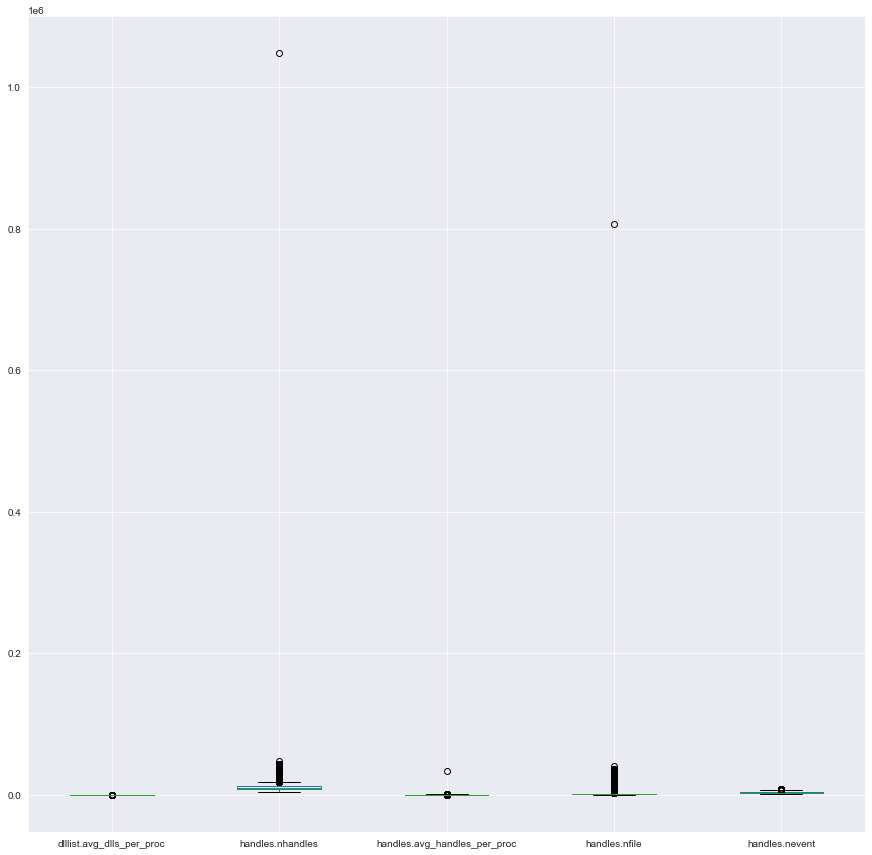

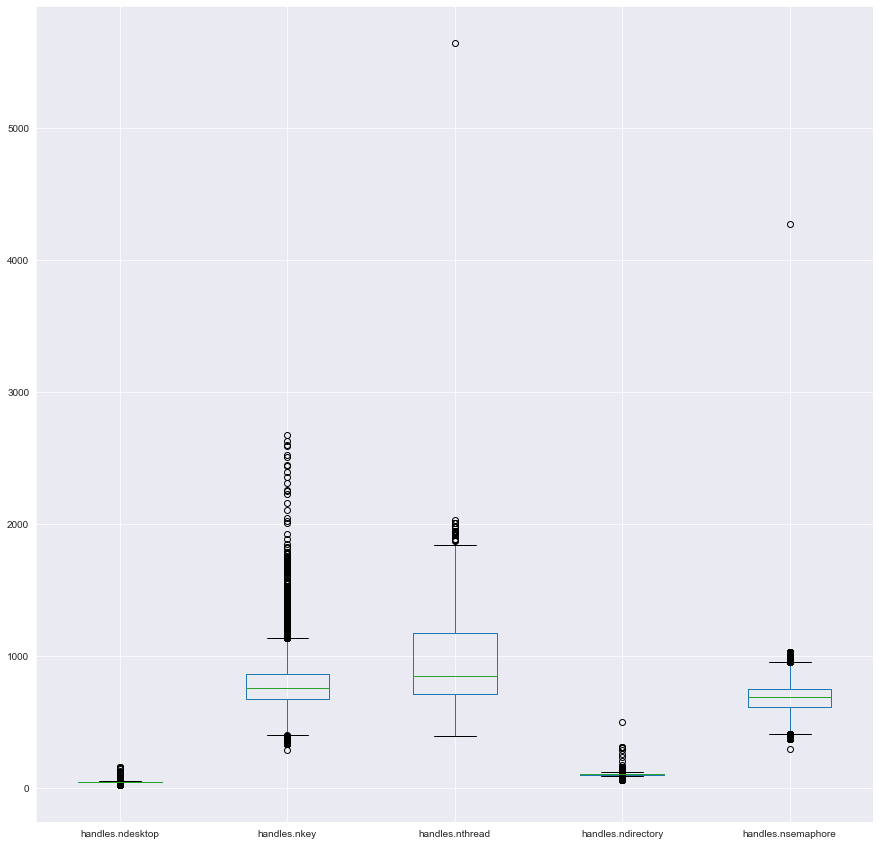

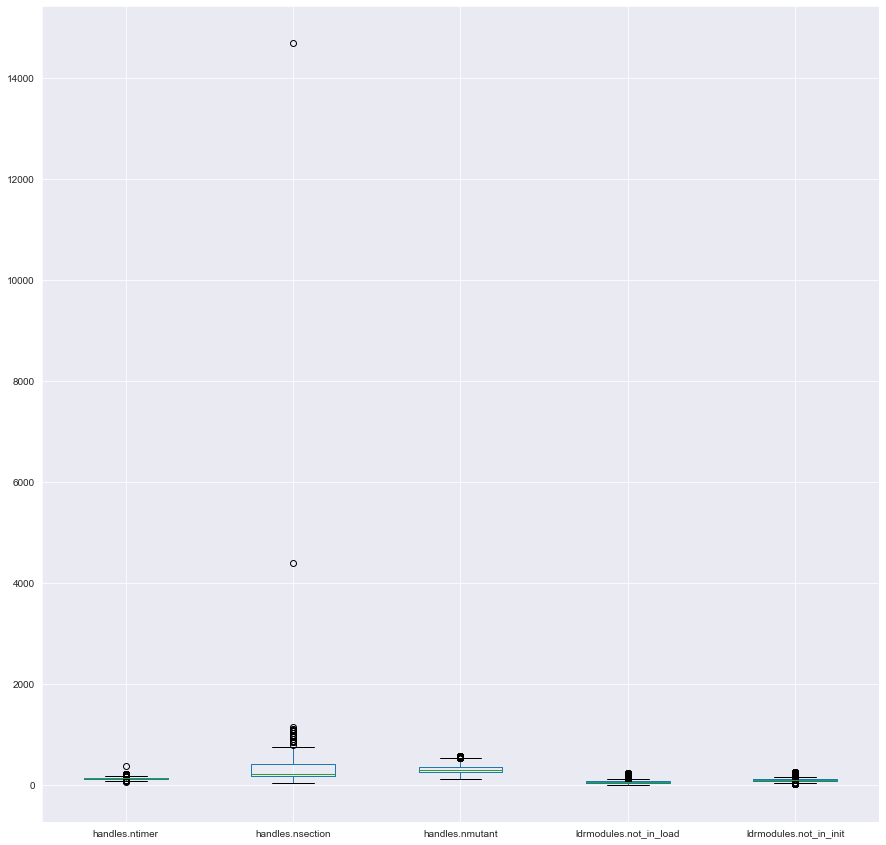

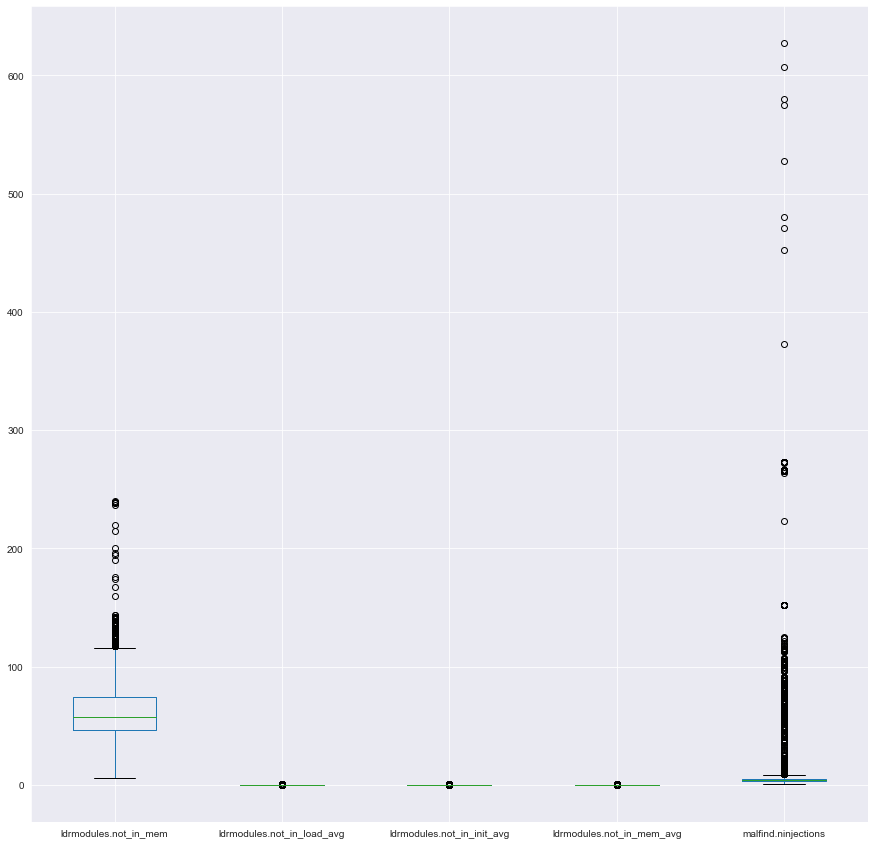

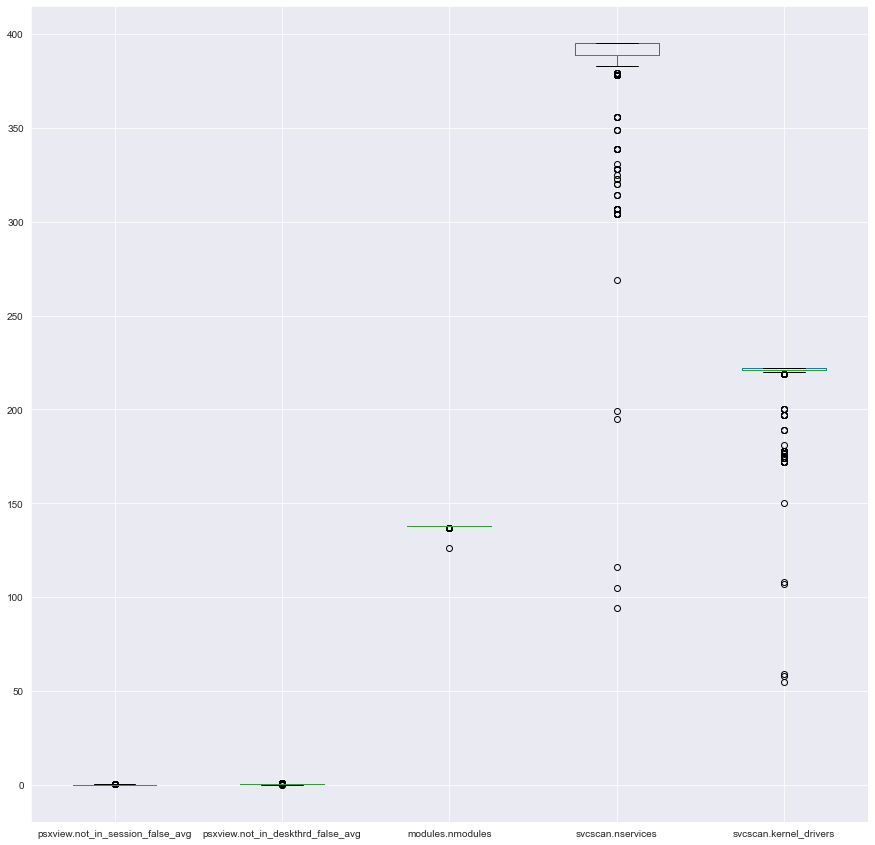

In [7]:
count = 0
while (count < X.columns.size):
    X.iloc[:, count: count + 5].boxplot()
    box = plt.gcf()
    box.set_size_inches(15, 15)
    plt.show()
    count = count + 5


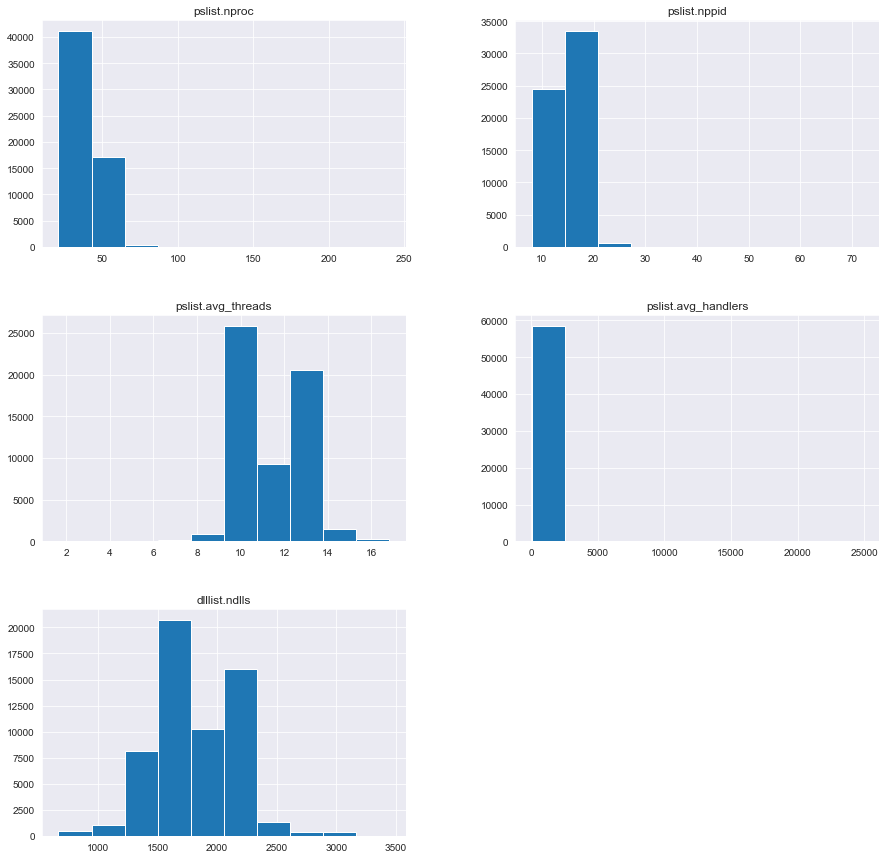

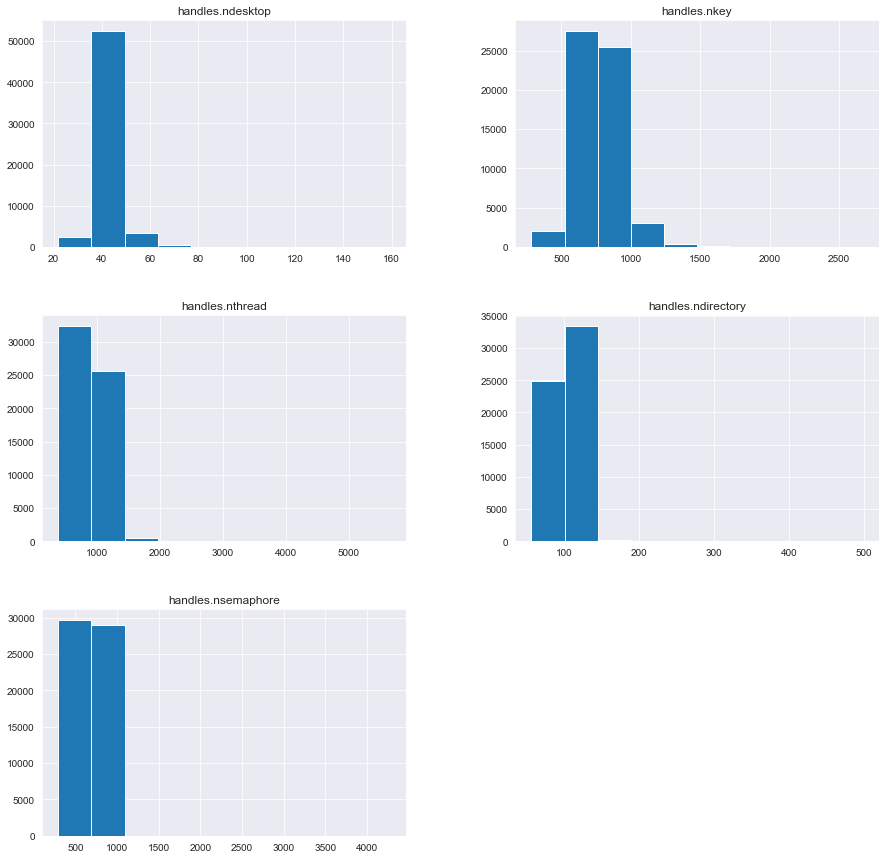

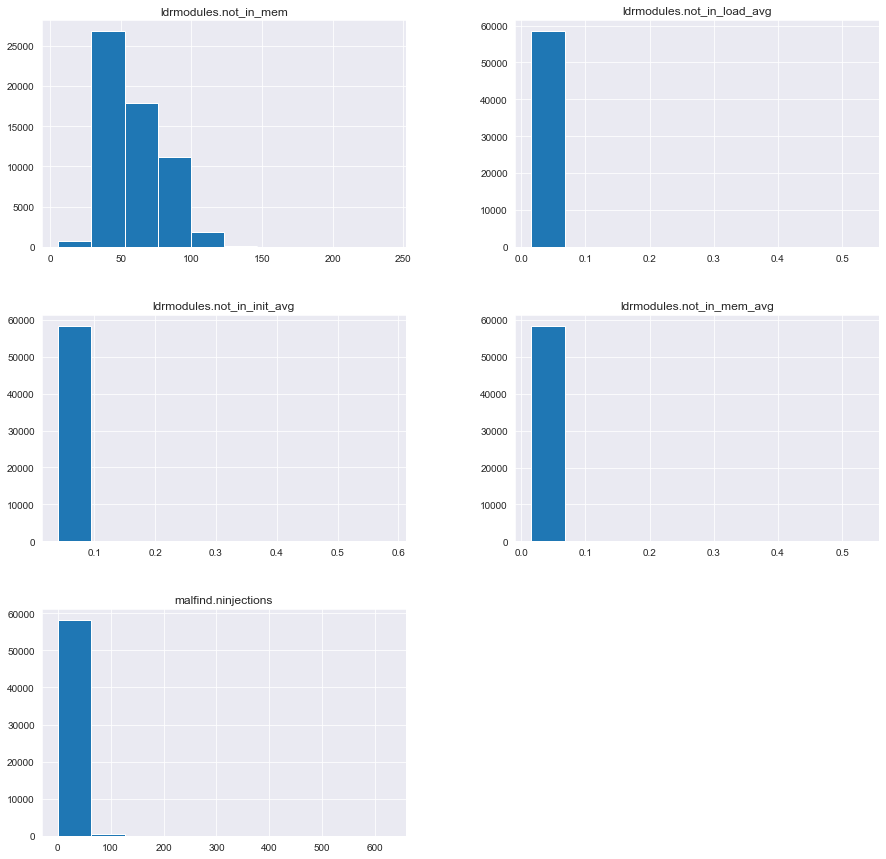

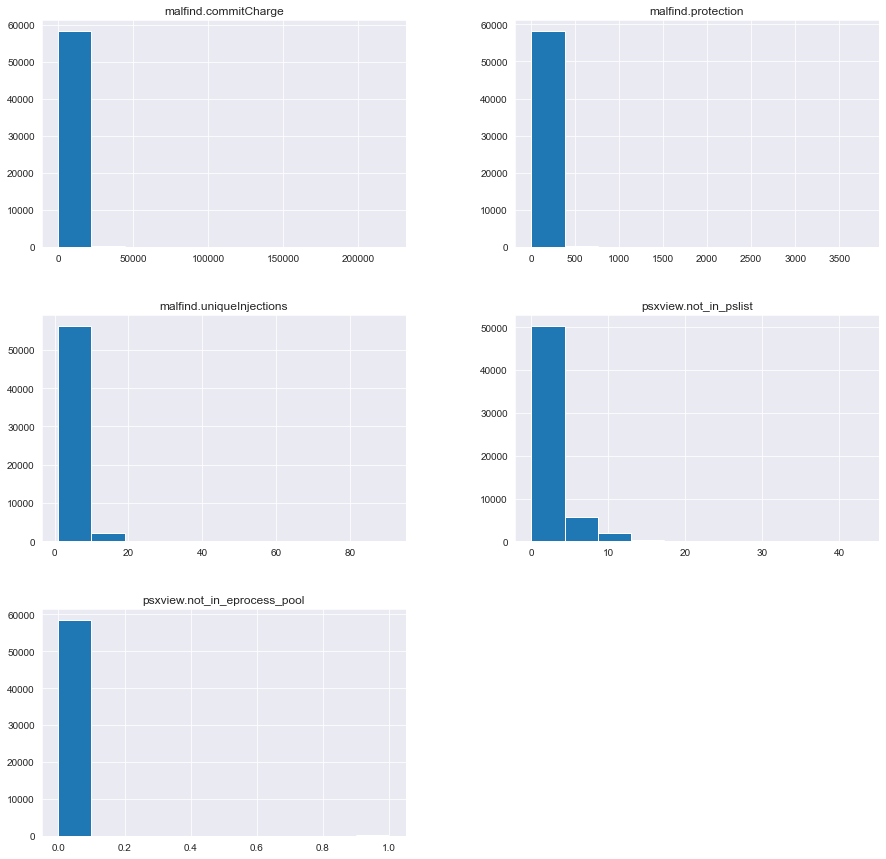

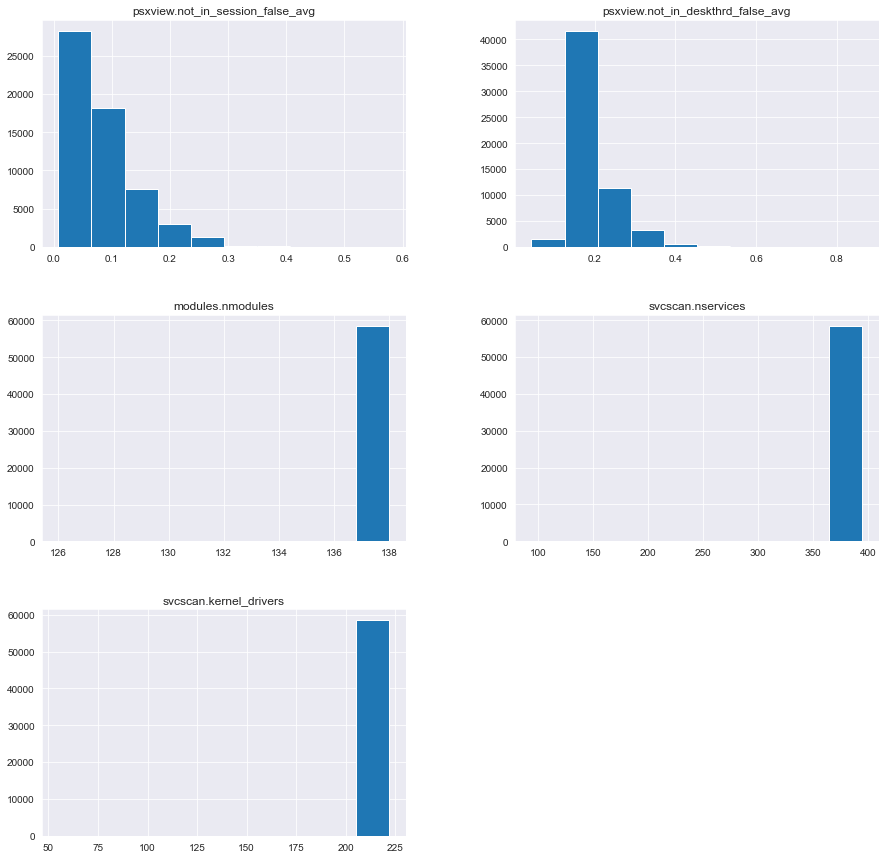

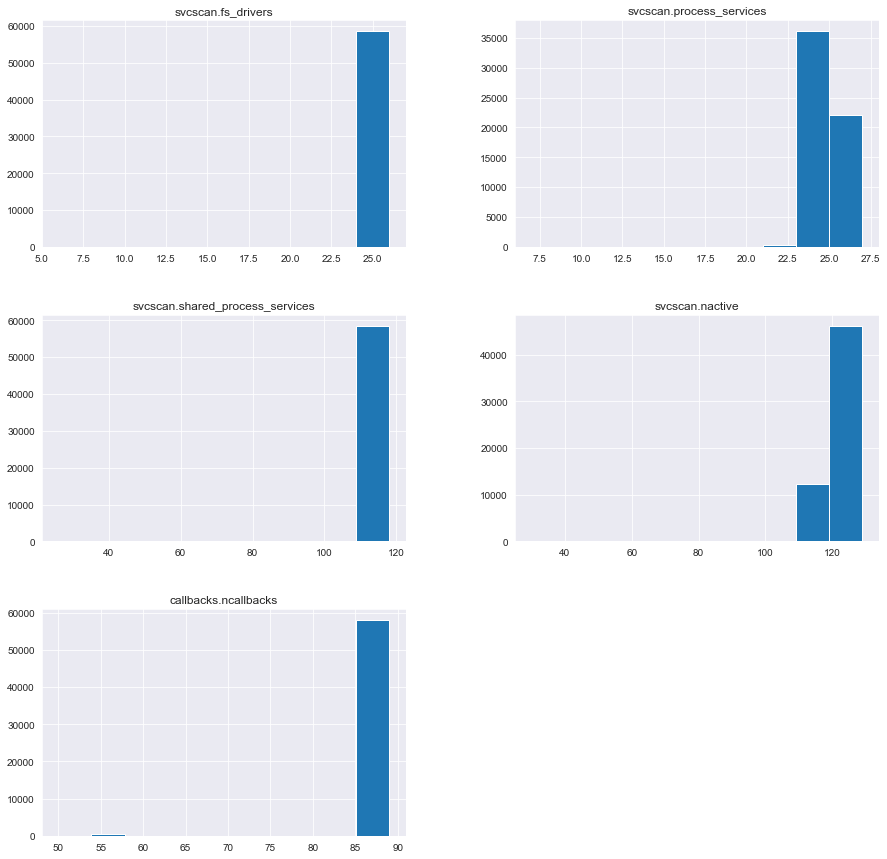

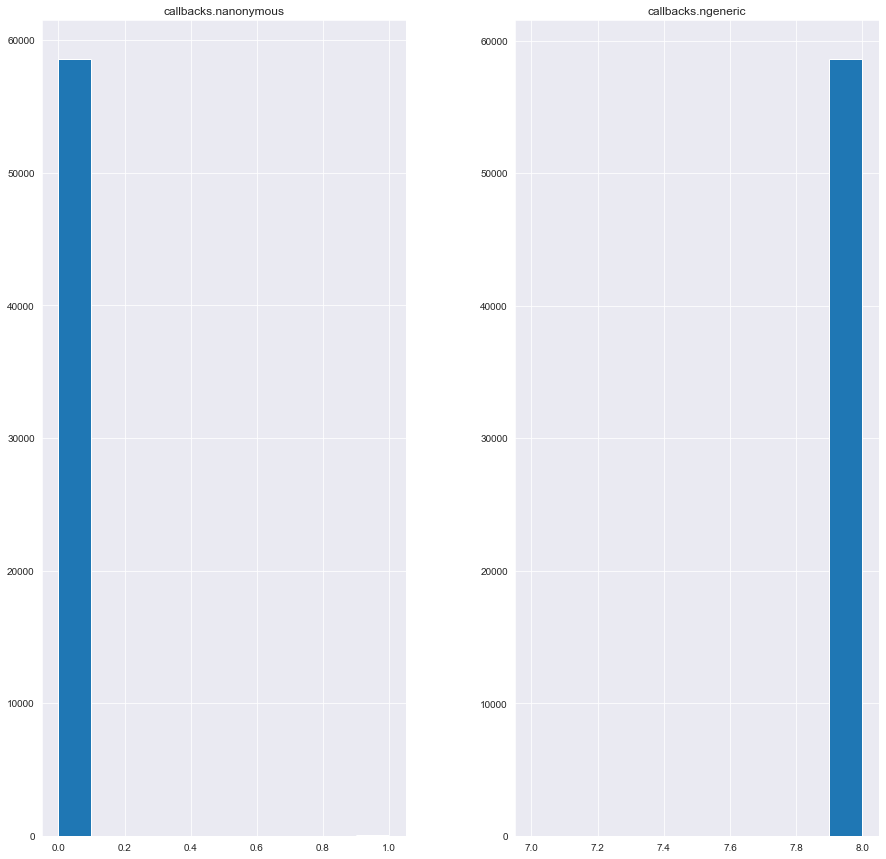

In [8]:
#look for outliers using histogram
count = 0
while (count < X.columns.size):
    X.iloc[:, count: count + 5].hist()
    box = plt.gcf()
    box.set_size_inches(15, 15)
    plt.show()
    count = count + 5

In [9]:
Xcolumns = X.columns

***Normalising data***
*The data needs to be normalised as it is evident from the histogram that the data is not spread out.

In [10]:
#Standardise data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Standardised data")

Standardised data


In [11]:
X = pd.DataFrame(data=X, columns=Xcolumns)


In [12]:
X

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0          0.624044      0.860519           -0.494957            -0.399308   
1          0.970233      1.613326            0.119794            -0.047165   
2         -0.241427     -0.268691            2.130278             0.363994   
3         -1.626181     -0.645094            1.358973             0.149937   
4          0.104762      0.484116            0.069717             0.302382   
...             ...           ...                 ...                  ...   
58591     -0.760710      0.107713           -0.776687            -0.286289   
58592     -0.760710     -0.268691           -0.878790            -0.512205   
58593     -0.587615      0.107713           -0.944172            -0.335102   
58594     -0.760710      0.107713           -0.691601            -0.286047   
58595     -0.587615      0.107713           -0.927602            -0.308282   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0          -0.354192                  -0.906971         -0.232099   
1           0.798092                   0.073120          0.231448   
2           0.367501                   0.799759          0.261036   
3          -1.109241                   0.252255         -0.370177   
4           0.776865                   0.958987          0.320007   
...              ...                        ...               ...   
58591      -1.084983                  -0.772824         -0.469626   
58592      -1.406409                  -1.271758         -0.661743   
58593      -1.100144                  -0.975717         -0.467776   
58594      -1.088015                  -0.777531         -0.469420   
58595      -0.981884                  -0.796978         -0.444558   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                         -0.255199      -0.066754       -0.510780   
1                         -0.050185      -0.017224        0.234141   
2                          0.264825       0.043959        0.525902   
3                          0.100825      -0.078407       -0.759088   
4                          0.217621       0.002587        0.324774   
...                             ...            ...             ...   
58591                     -0.233389      -0.078407       -0.935386   
58592                     -0.406475      -0.086274       -1.463039   
58593                     -0.231723      -0.080156       -0.939110   
58594                     -0.233204      -0.077825       -0.935386   
58595                     -0.250240      -0.076368       -0.905589   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
0              0.284979     -0.387490        -0.174547            0.163725   
1              1.253744      1.573871         0.426759            1.492614   
2              0.091226      0.064621         1.314001           -0.245163   
3             -1.652552     -0.799708        -0.574017           -1.982941   
4              0.091226      3.176203         0.056724            0.061503   
...                 ...           ...              ...                 ...   
58591         -0.877540     -0.706626        -1.112249           -1.062941   
58592         -1.071293     -1.457927        -1.280447           -1.165163   
58593         -0.877540     -0.673383        -1.124864           -1.062941   
58594         -0.877540     -0.706626        -1.099634           -1.062941   
58595         -0.683787     -0.606896        -1.091224           -0.858496   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
0               -0.130533       -0.356018         -0.735578        -0.759695   
1                0.874436        1.180888          0.324877         1.112591   
2               -0.405577        0.512668          0.546672         0.347277   
3               -1.230710       -0.222374         -0.721716        -0.964690   
4                1.498575        0.312202          0.588259    

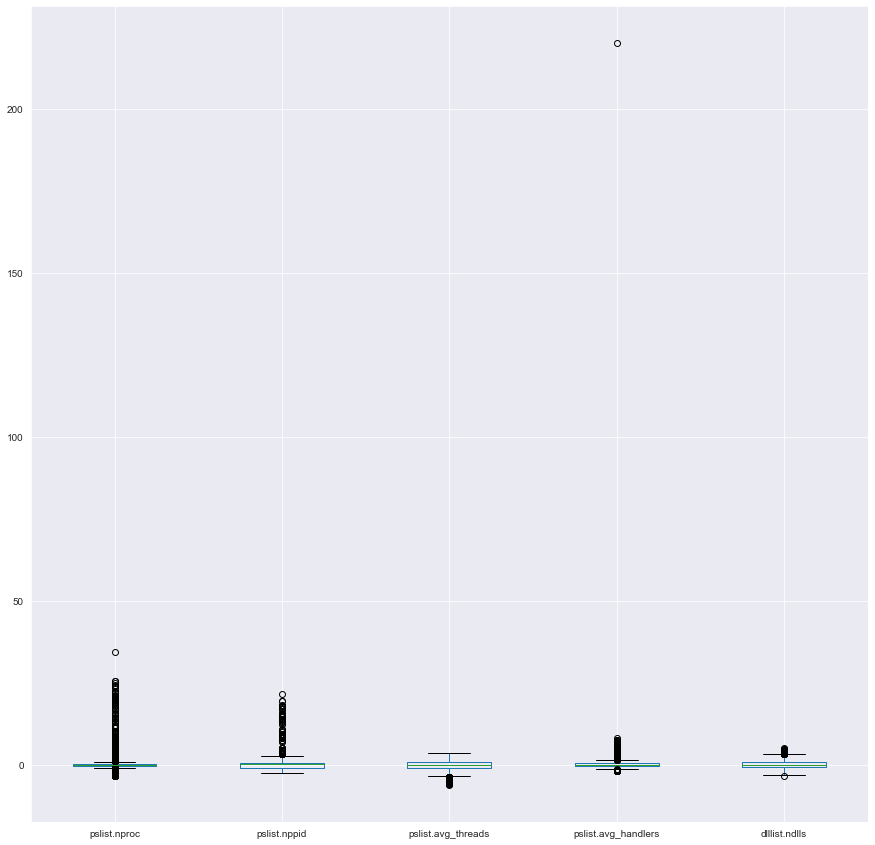

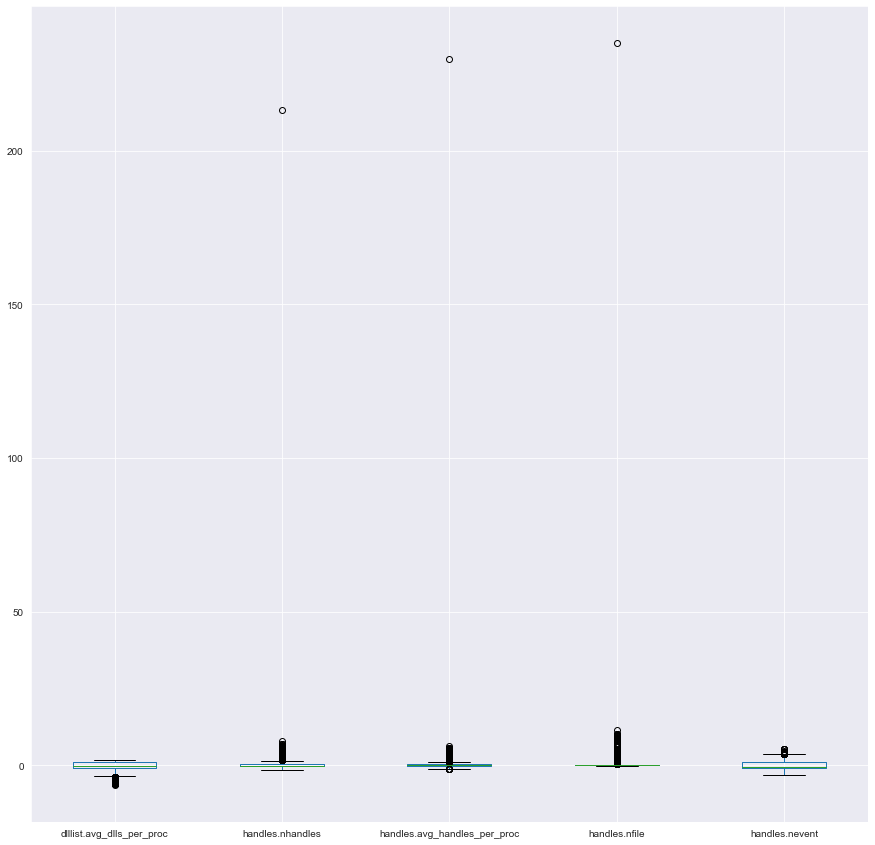

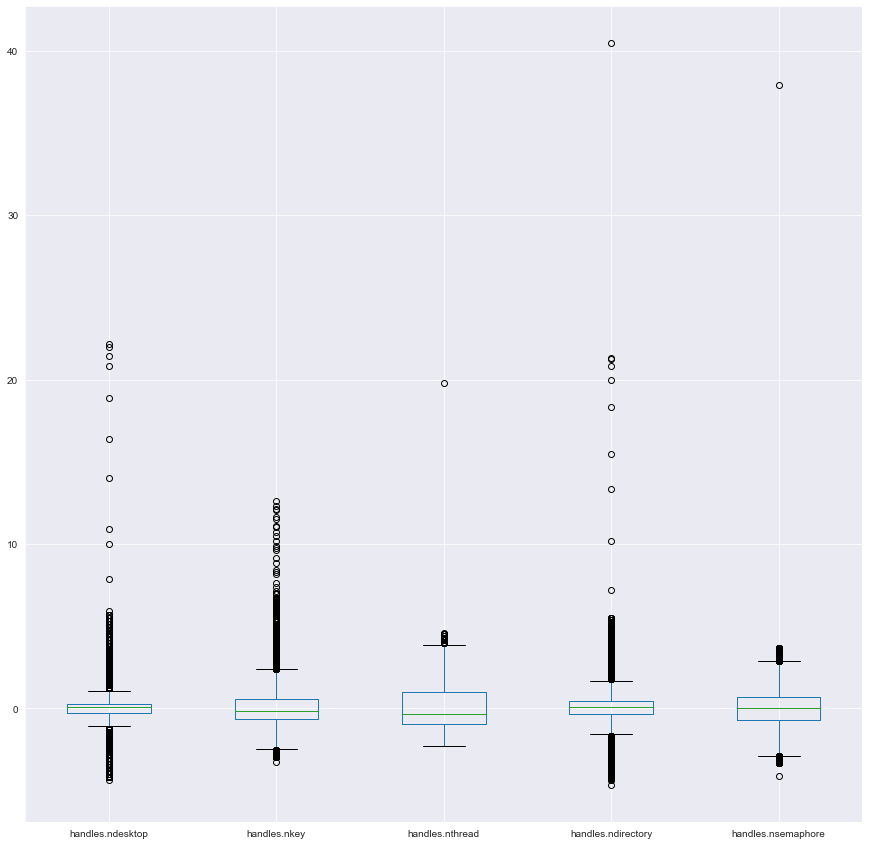

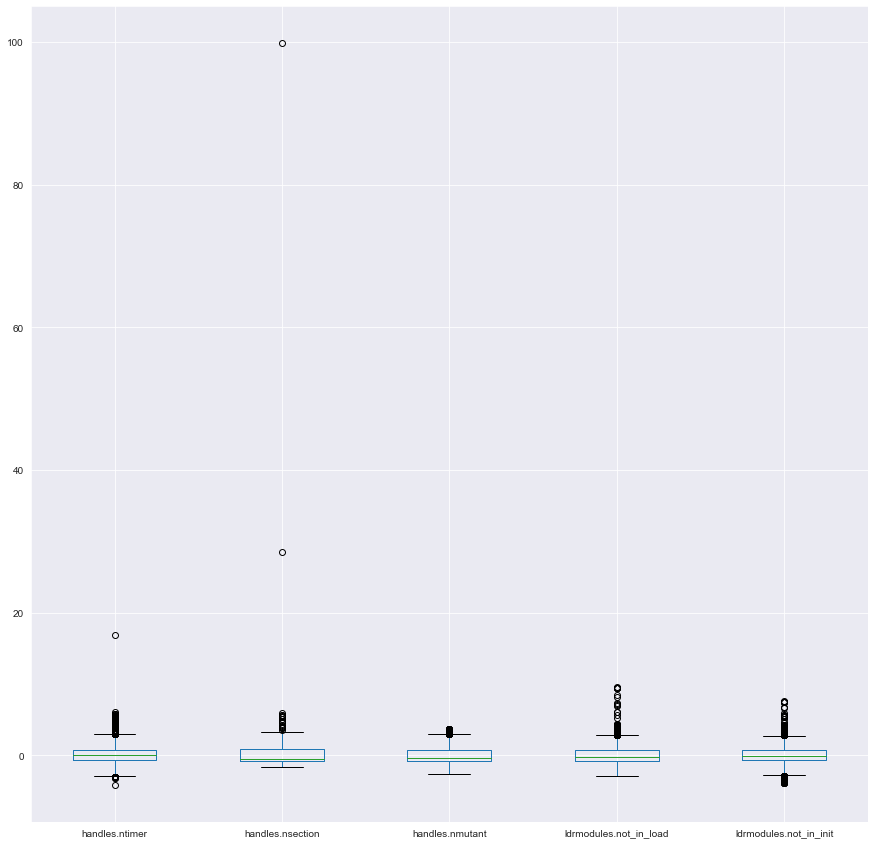

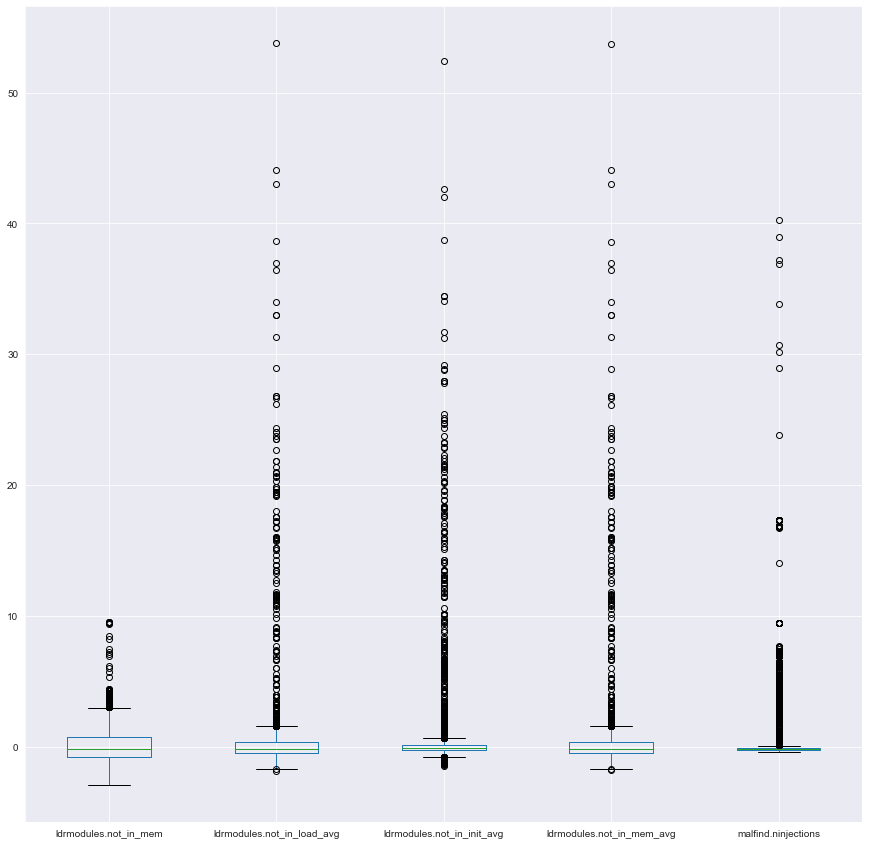

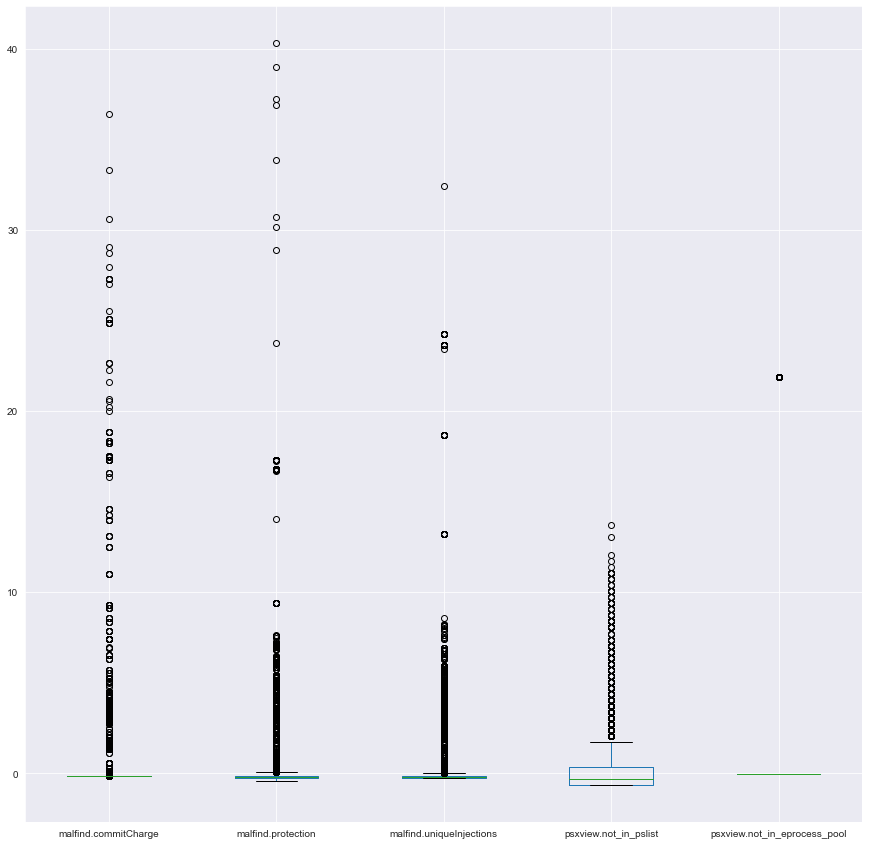

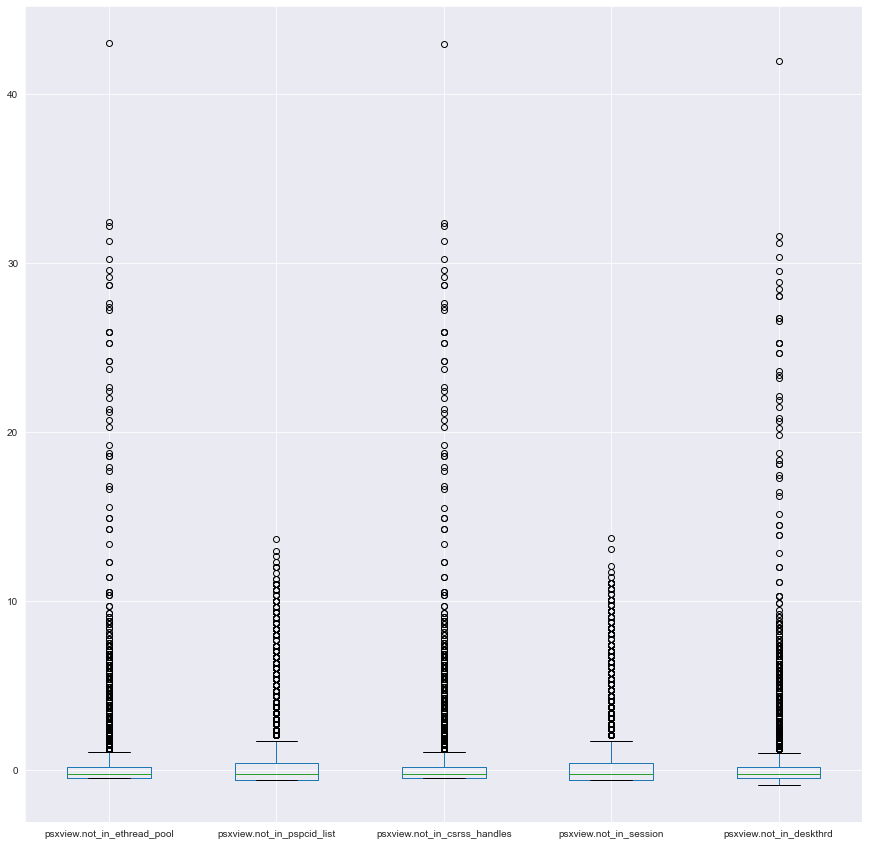

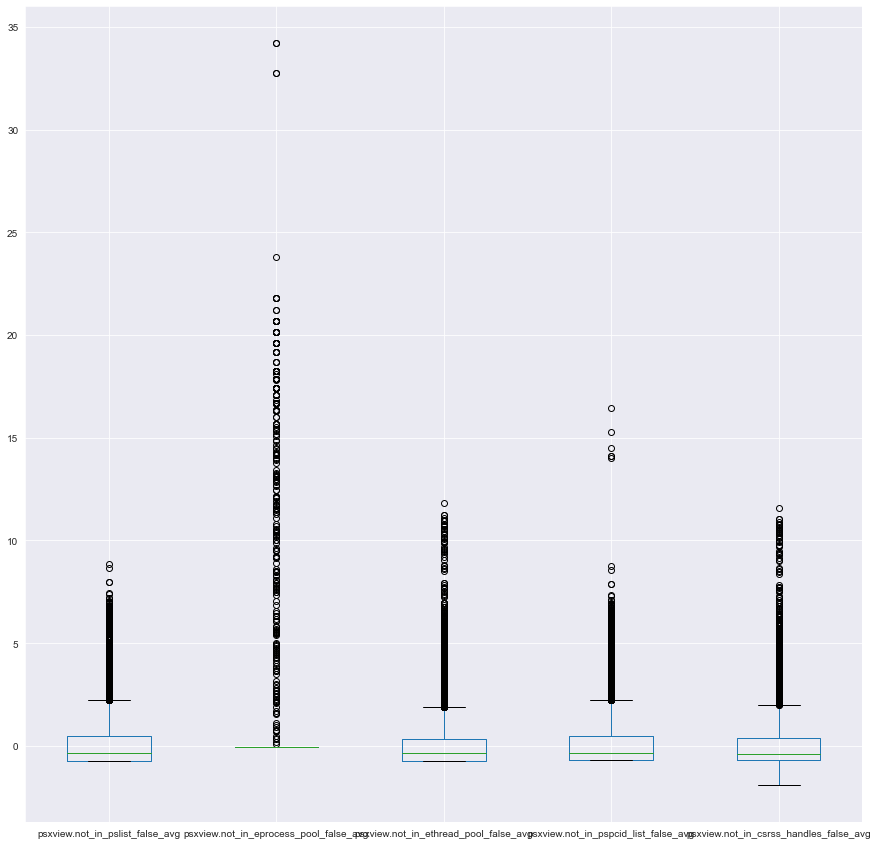

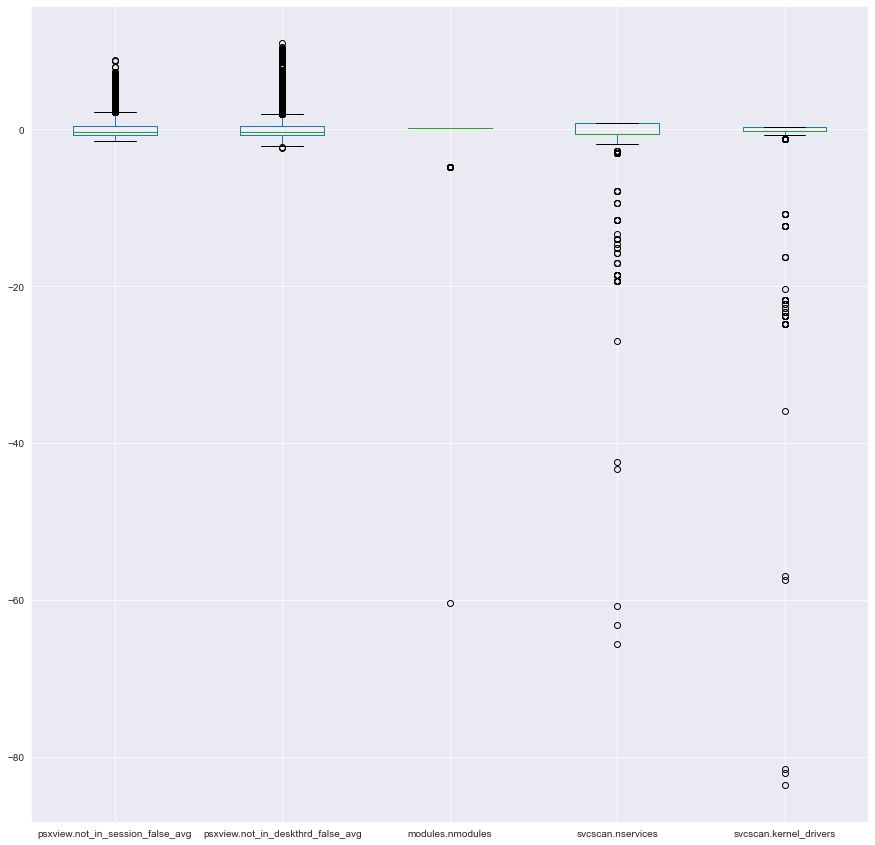

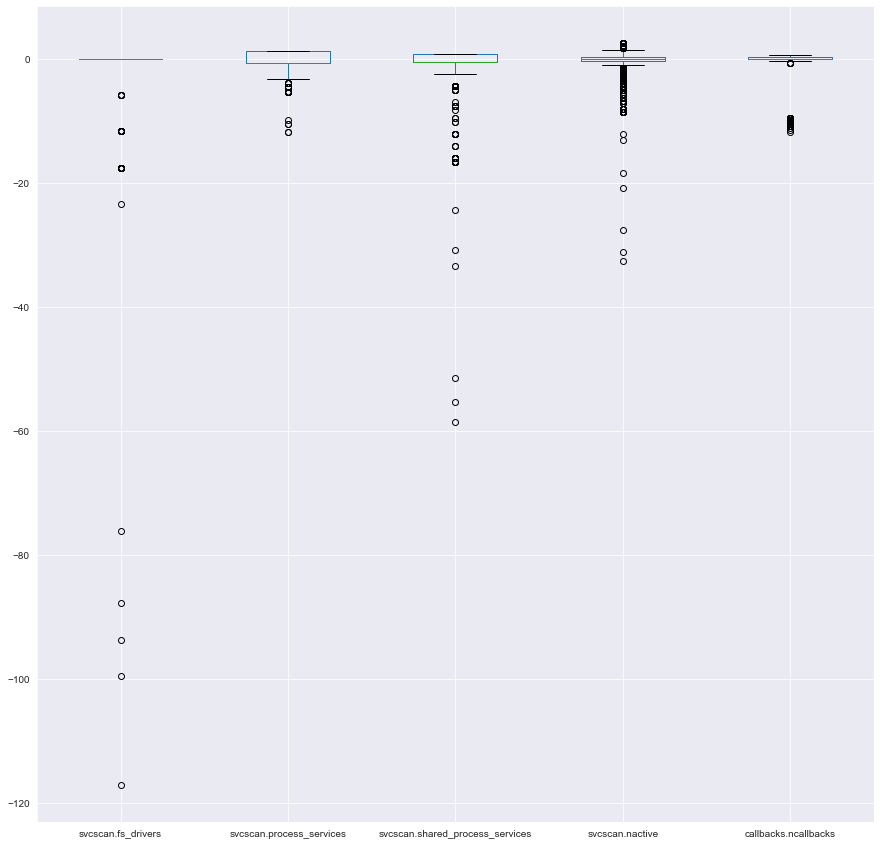

In [13]:
count = 0
while (count < X.columns.size):
    X.iloc[:, count: count + 5].boxplot()
    box = plt.gcf()
    box.set_size_inches(15, 15)
    plt.show()
    count = count + 5


***Scaling***
1. Robust scaler: (value = (value – median) / (p75 – p25))As it works best with outlier uses the 75th quartile and the 25th quartile, which is more suited to the standard scaler(value = (value – mean) / stdev) which only looks at the mean. Hence robust scaler is better suited for data with a lot of outliers.

!!! We want to get rid of outliers as they skew the data in a certain direction and not giving a fair valuation of the results.

In [14]:
#robust scaling
# scaler = RobustScaler()
# X = scaler.fit_transform(X)
# print("Robust scaled data")

In [15]:
#quantile transformation (uniform distribution)
scaler = QuantileTransformer(output_distribution='uniform')
X = scaler.fit_transform(X)
print("Quantile transformed data")

Quantile transformed data


In [16]:
X = pd.DataFrame(data=X, columns=Xcolumns)

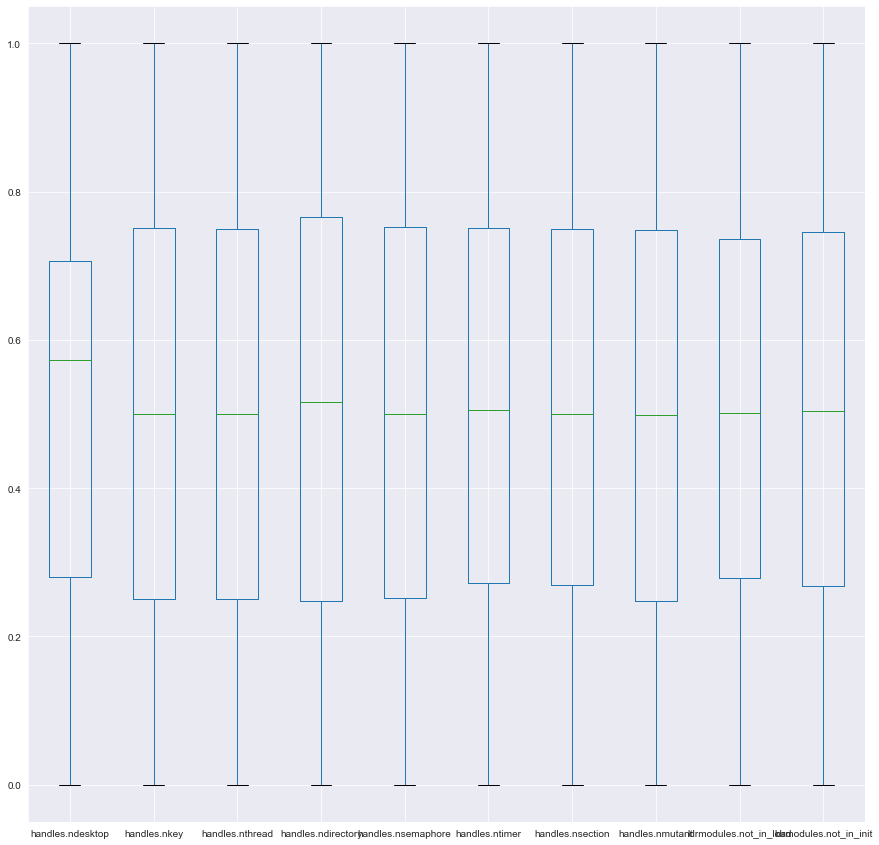

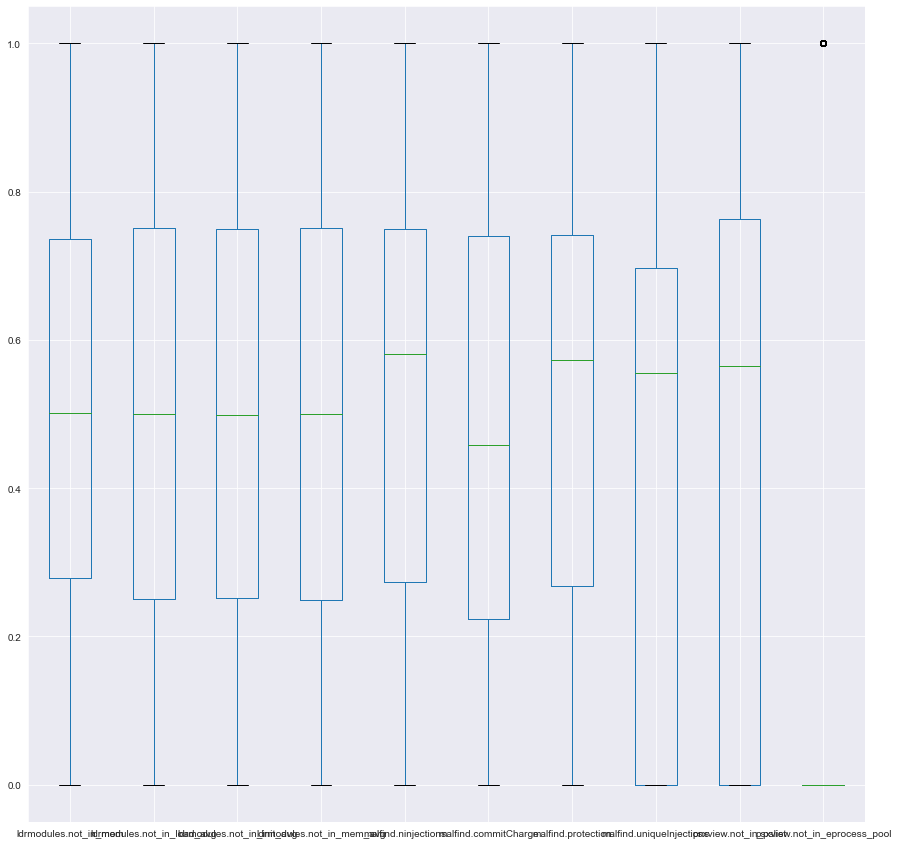

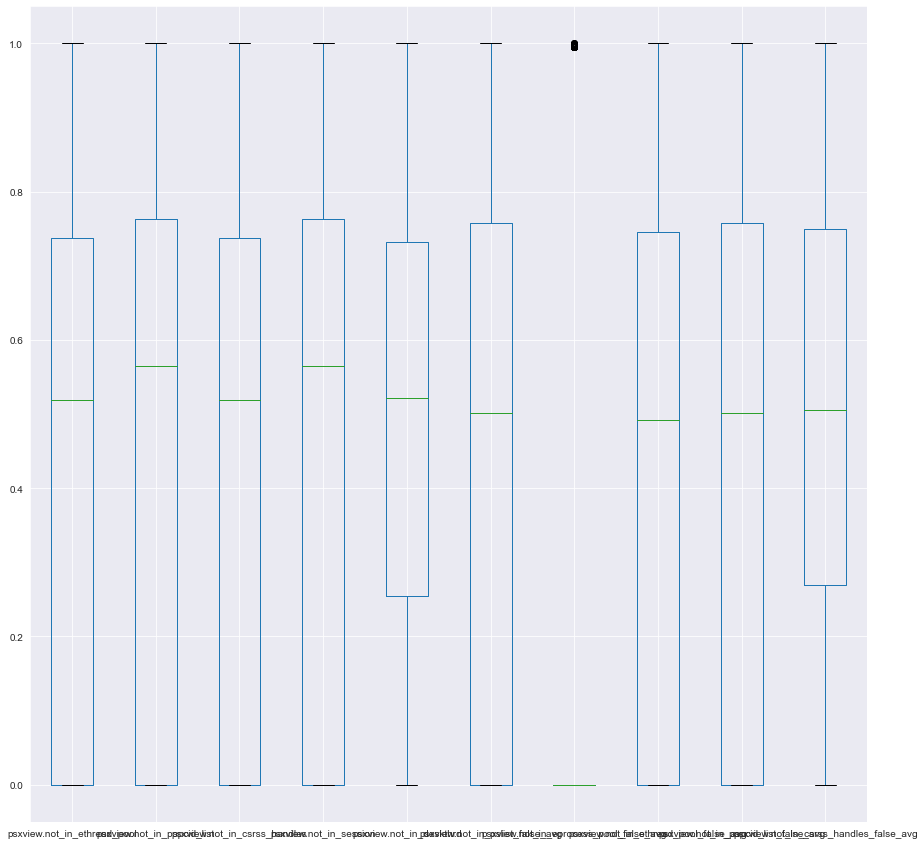

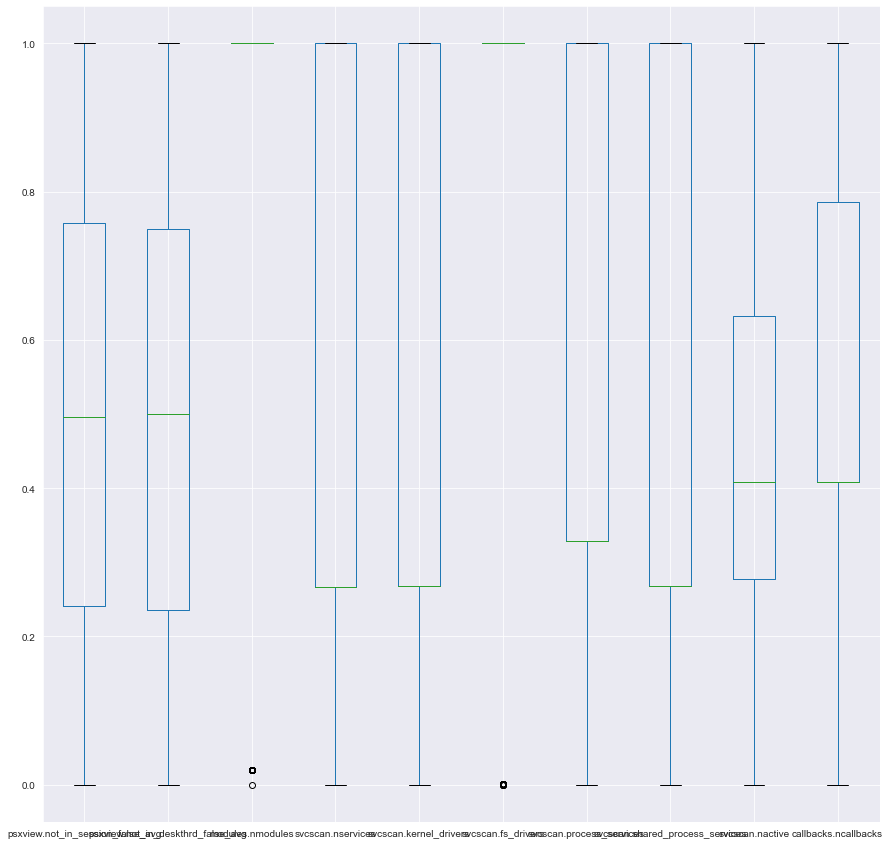

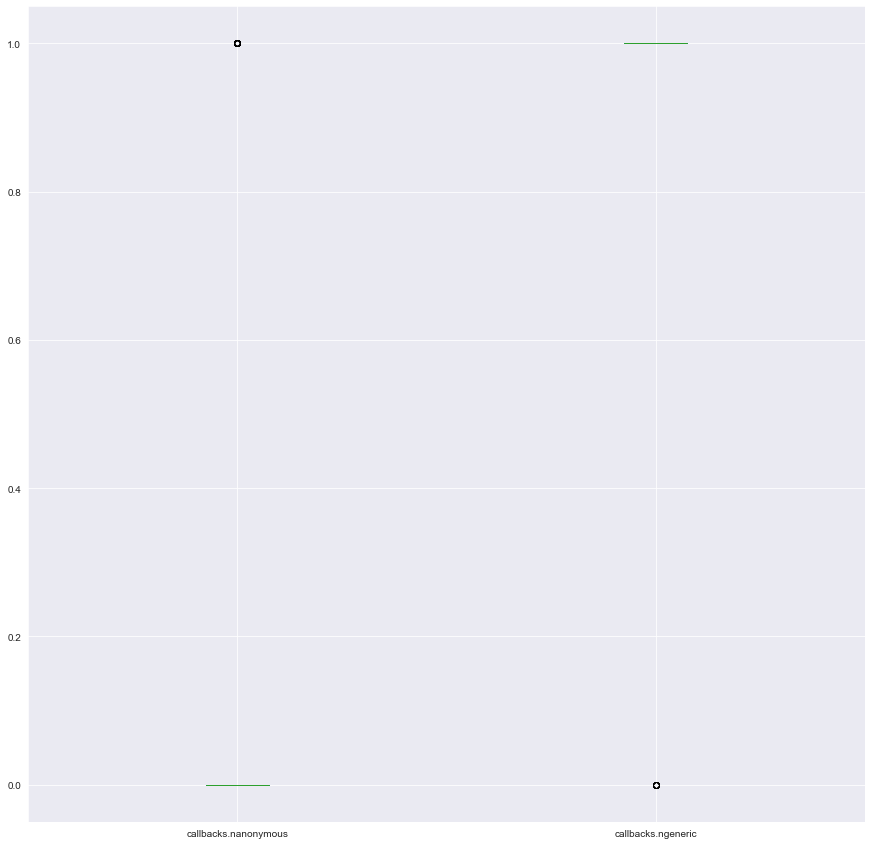

In [17]:
#look for outliers using plot
count = 0
while (count < X.columns.size):
    X.iloc[:, count: count + 10].boxplot()
    box = plt.gcf()
    box.set_size_inches(15, 15)
    plt.show()
    count = count + 10

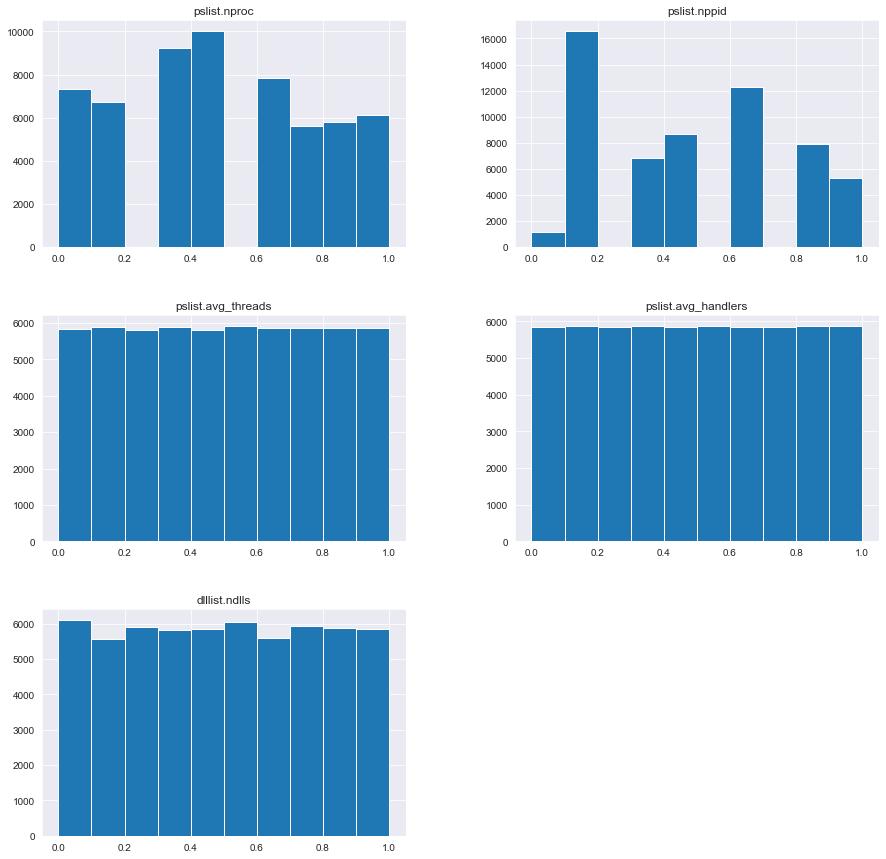

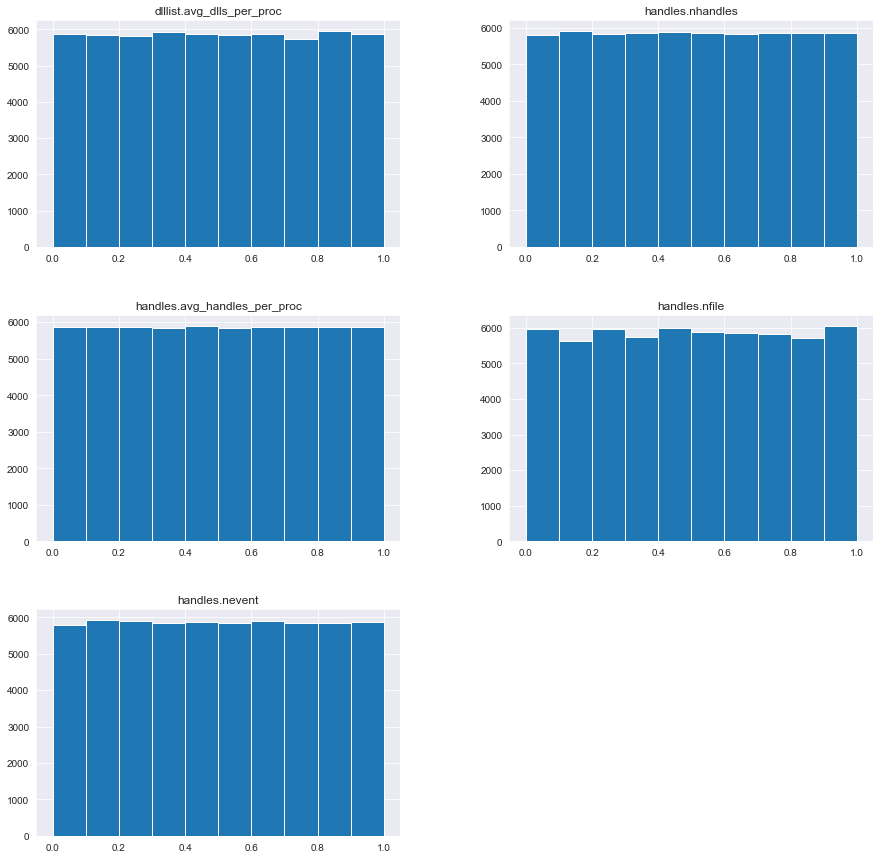

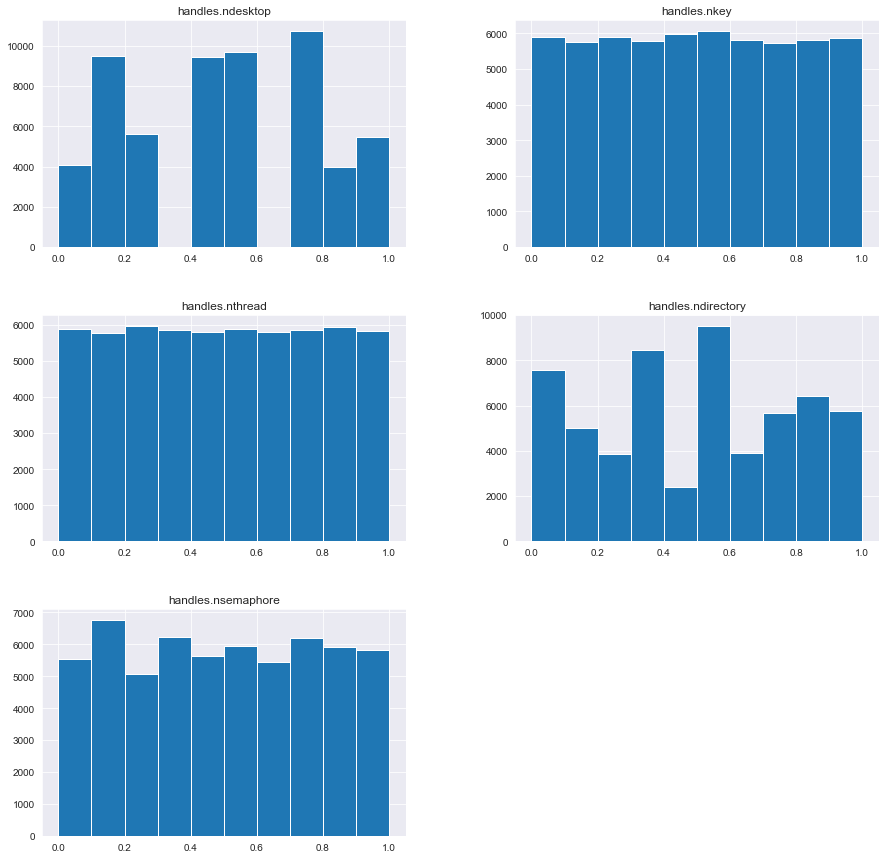

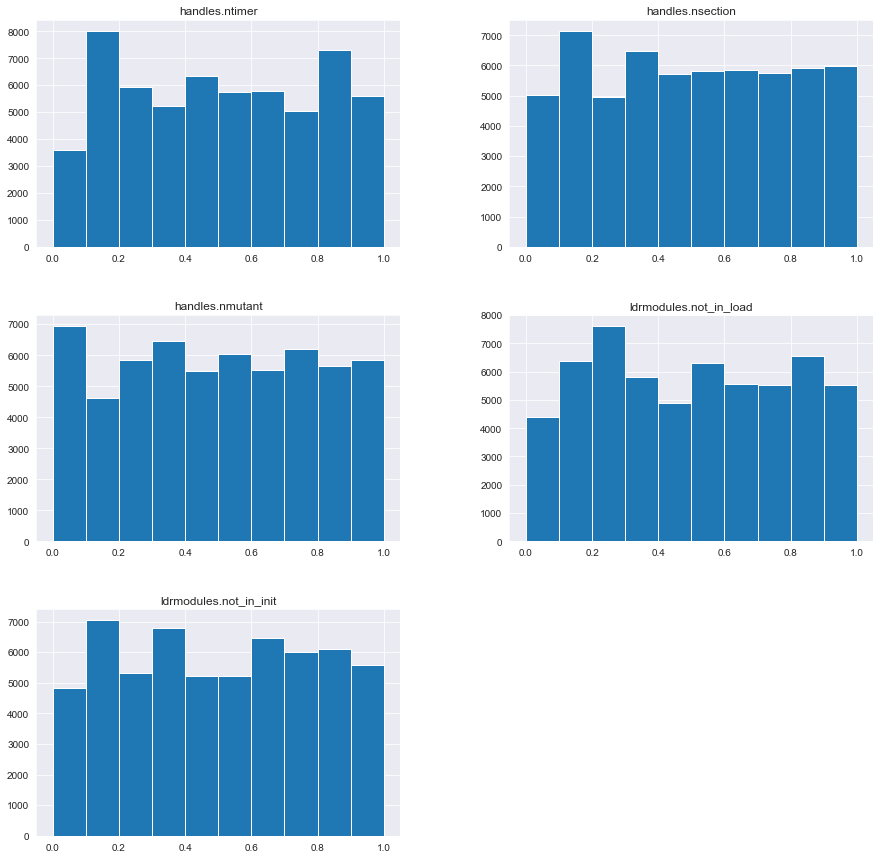

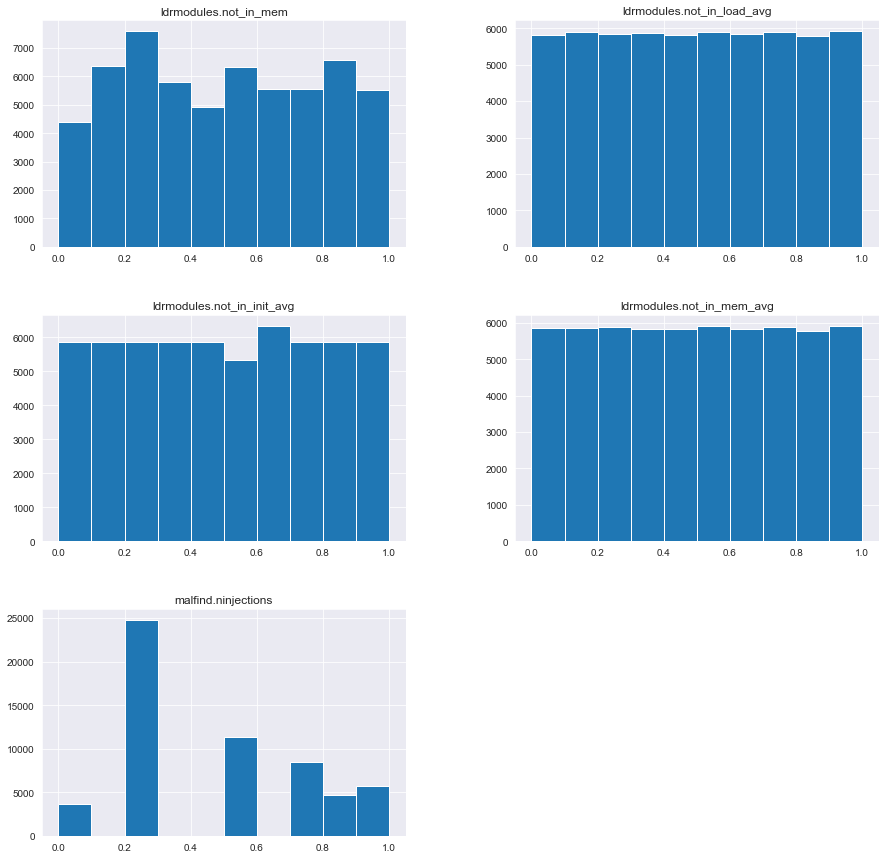

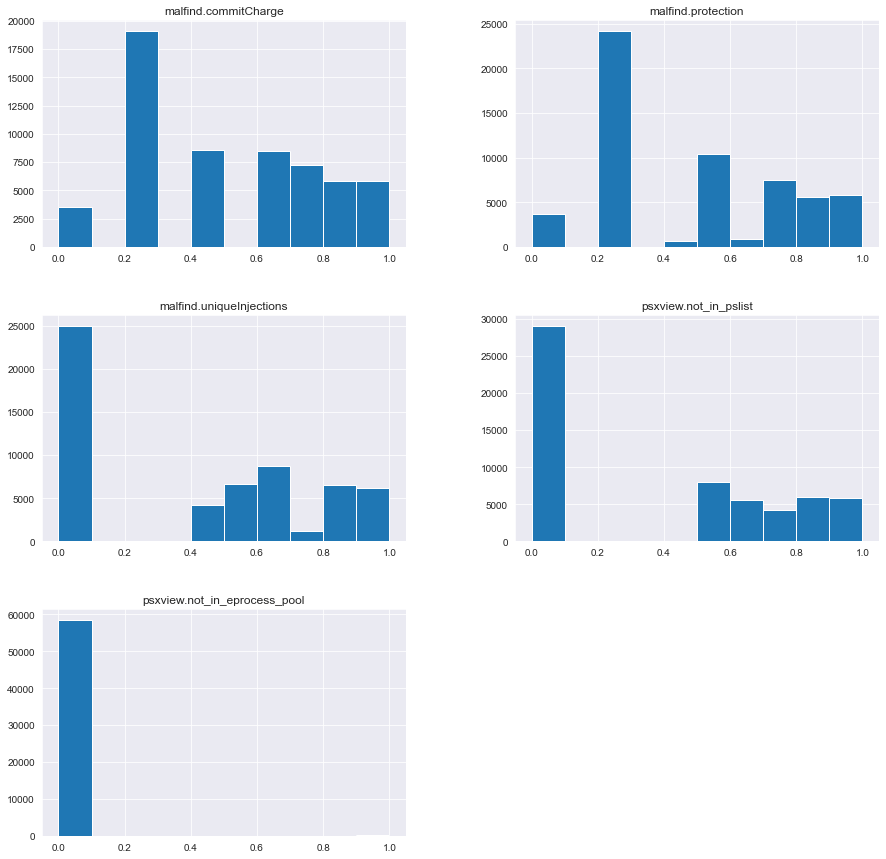

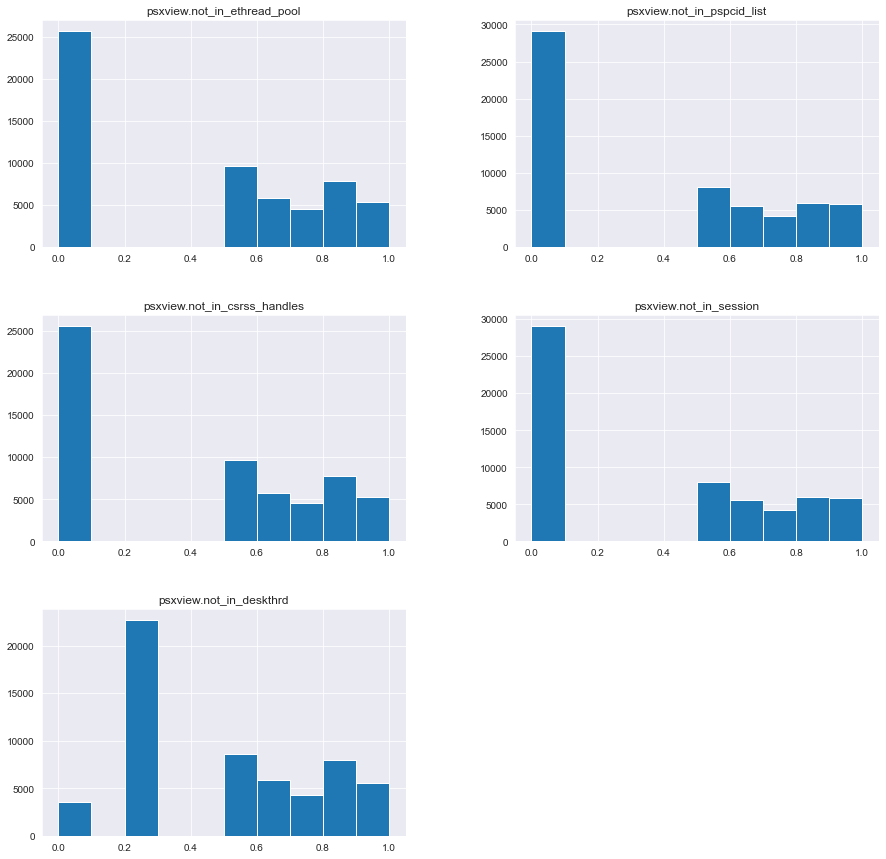

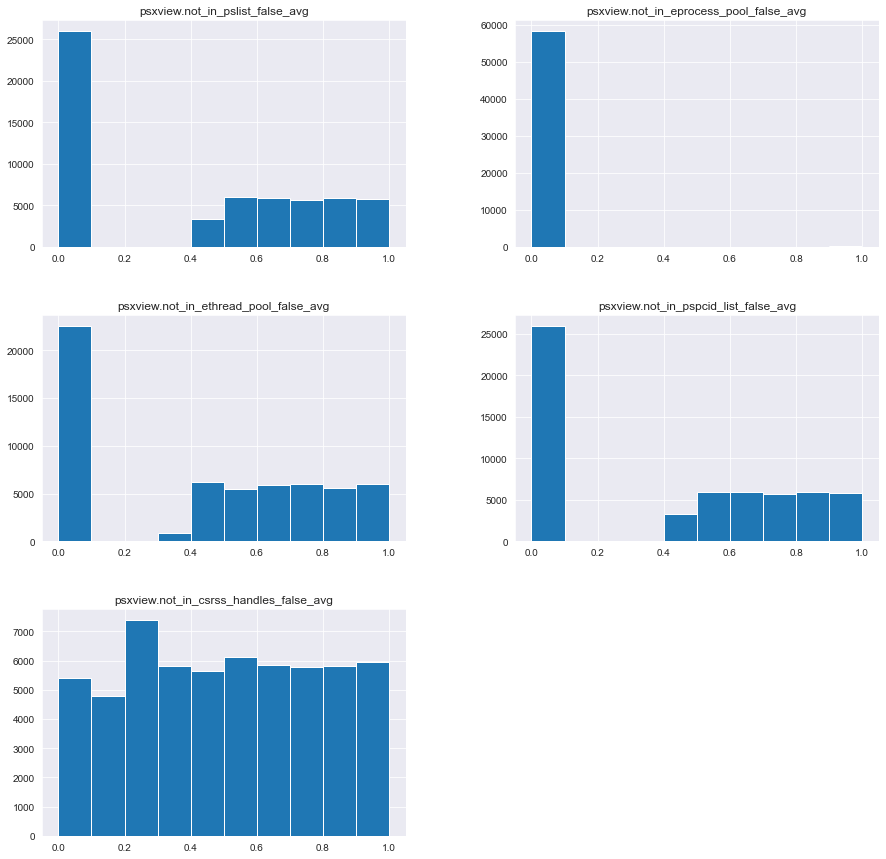

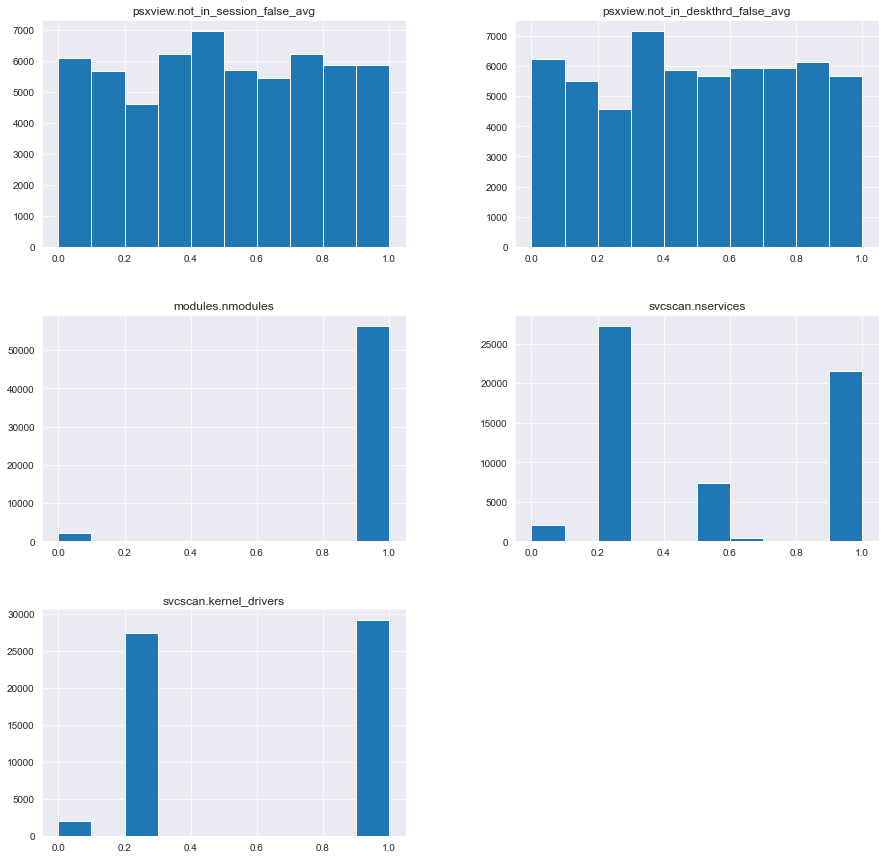

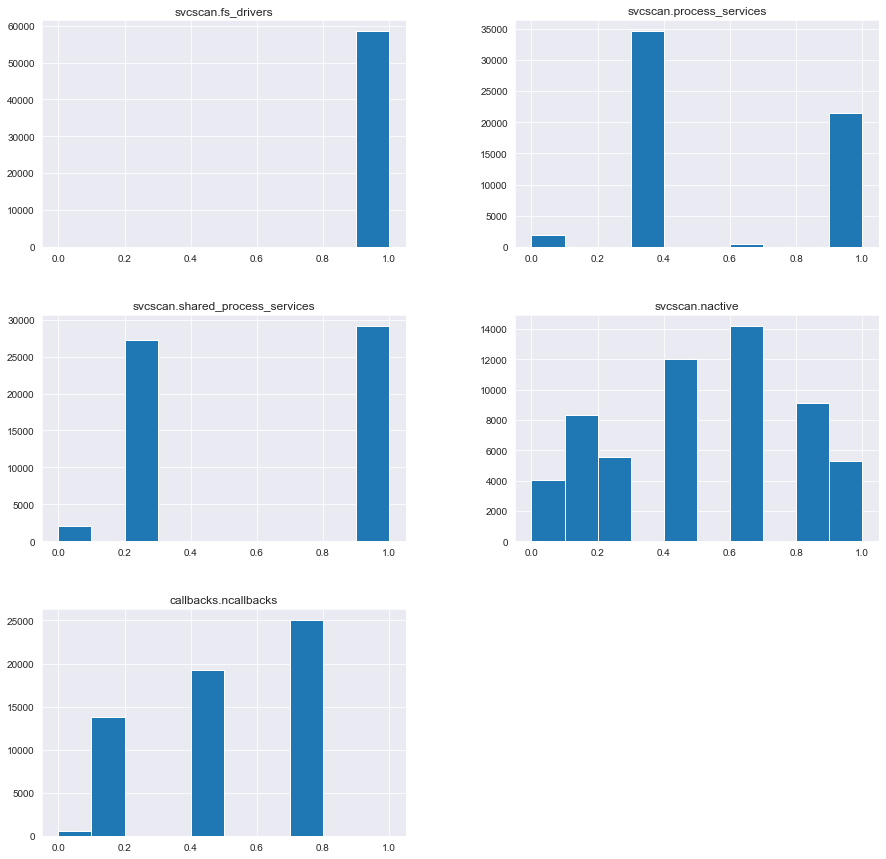

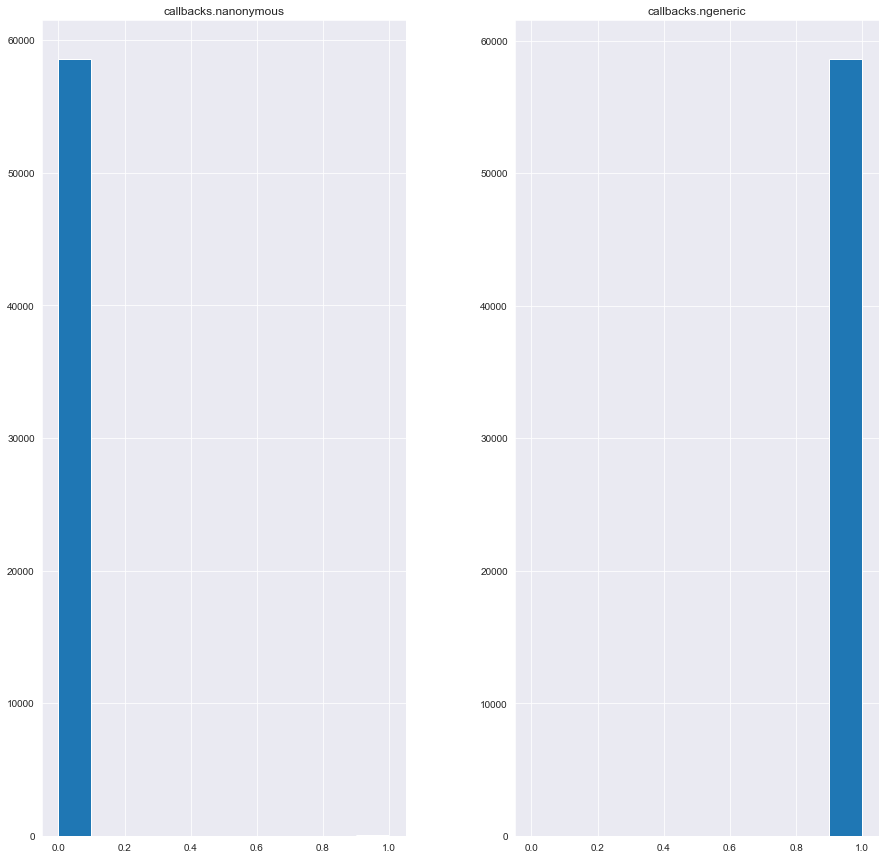

In [18]:
#look for outliers using histogram
count = 0
while (count < X.columns.size):
    X.iloc[:, count: count + 5].hist()
    box = plt.gcf()
    box.set_size_inches(15, 15)
    plt.show()
    count = count + 5
    

In [19]:
X.head(50)

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0       0.910410      0.842843            0.424132             0.136877   
1       0.943443      0.969469            0.581310             0.494805   
2       0.318318      0.397898            0.992981             0.734399   
3       0.027027      0.339339            0.929930             0.588240   
4       0.634635      0.670671            0.570060             0.660227   
5       0.318318      0.160661            0.970971             0.960545   
6       0.749249      0.339339            0.972417             0.936257   
7       0.634635      0.670671            0.570060             0.661249   
8       0.634635      0.670671            0.570060             0.659354   
9       0.318318      0.160661            0.977238             0.970971   
10      0.749249      0.339339            0.899770             0.902774   
11      0.634635      0.670671            0.526966             0.655474   
12      0.318318      0.160661            0.973759             0.961915   
13      0.749249      0.339339            0.869524             0.890073   
14      0.634635      0.670671            0.537464             0.655621   
15      0.318318      0.160661            0.946968             0.957393   
16      0.482482      0.160661            0.932706             0.938084   
17      0.634635      0.670671            0.413413             0.502121   
18      0.318318      0.160661            0.938235             0.951843   
19      0.482482      0.160661            0.909910             0.932738   
20      0.482482      0.670671            0.587091             0.607950   
21      0.027027      0.016517            0.660137             0.681370   
22      0.318318      0.160661            0.885886             0.937860   
23      0.634635      0.160661            0.956415             0.957875   
24      0.318318      0.339339            0.837201             0.807112   
25      0.749249      0.842843            0.581544             0.613874   
26      0.318318      0.160661            0.893732             0.940134   
27      0.749249      0.160661            0.926927             0.916069   
28      0.846346      0.842843            0.607882             0.721604   
29      0.318318      0.160661            0.885886             0.938666   
30      0.749249      0.160661            0.921025             0.912612   
31      0.965465      0.994995            0.558559             0.629088   
32      0.318318      0.160661            0.867868             0.935537   
33      0.749249      0.160661            0.926927             0.910571   
34      0.943443      0.969469            0.574041             0.493481   
35      0.139139      0.339339            0.992800             0.756520   
36      0.027027      0.339339            0.816010             0.588737   
37      0.965465      0.994995            0.528529             0.628420   
38      0.318318      0.160661            0.851202             0.935945   
39      0.749249      0.160661            0.926927             0.899053   
40      0.965465      0.994995            0.512085             0.626897   
41      0.318318      0.160661            0.885886             0.941120   
42      0.749249      0.160661            0.916319             0.883841   
43      0.965465      0.994995            0.505623             0.622703   
44      0.318318      0.160661            0.900349             0.938207   
45      0.749249      0.160661            0.869524             0.875863   
46      0.974975      0.998075            0.414244             0.532697   
47      0.318318      0.160661            0.893732             0.932469   
48      0.749249      0.160661            0.822556             0.870852   
49      0.965465      0.997998            0.416542             0.541983   

    dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0        0.479479                   0.204204          0.486379   
1        0.728228                   0.531450  

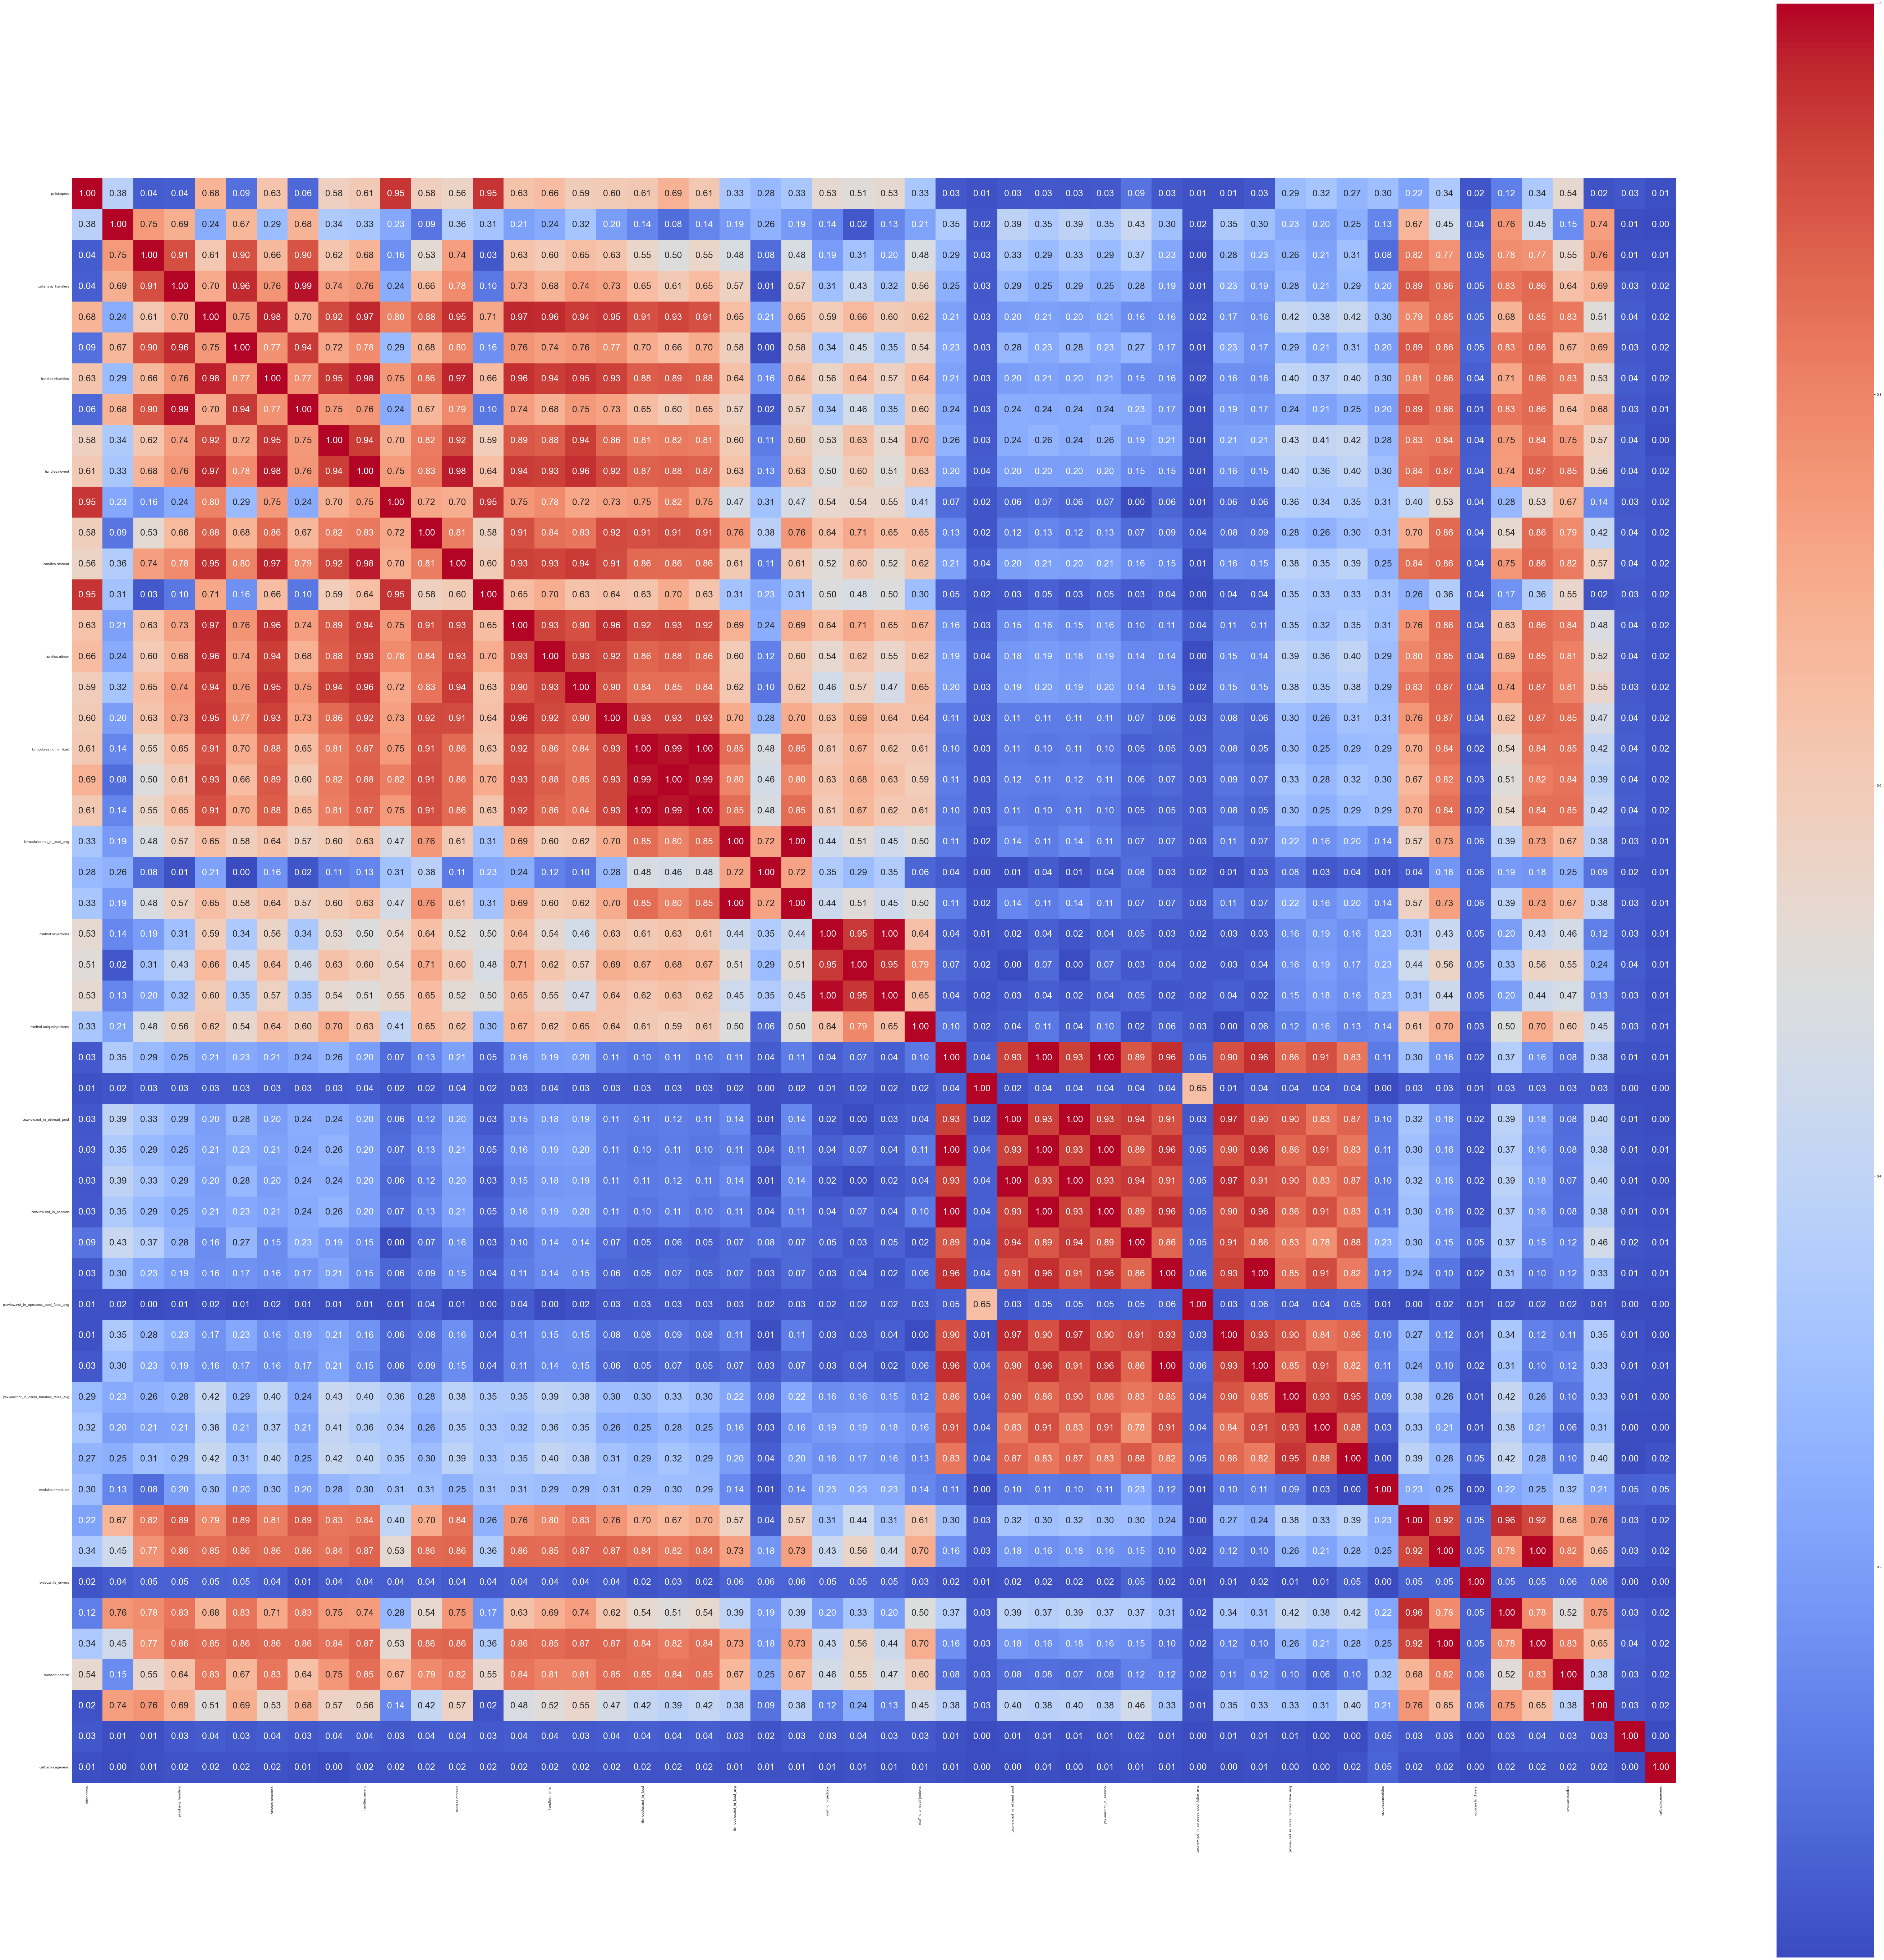

In [20]:


# absolute value correlation matrix
corr_matrix = X.corr().abs()

# heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 25})
his = plt.gcf()
his.set_size_inches(100, 100)
plt.show()

In [21]:
corr_matrix


pslist.nproc  pslist.nppid  \
pslist.nproc                                1.000000      0.379023   
pslist.nppid                                0.379023      1.000000   
pslist.avg_threads                          0.035590      0.748061   
pslist.avg_handlers                         0.040230      0.692270   
dlllist.ndlls                               0.679521      0.239096   
dlllist.avg_dlls_per_proc                   0.085420      0.669306   
handles.nhandles                            0.625555      0.290326   
handles.avg_handles_per_proc                0.063502      0.679893   
handles.nfile                               0.580106      0.343956   
handles.nevent                              0.606922      0.333190   
handles.ndesktop                            0.948173      0.230380   
handles.nkey                                0.584808      0.094623   
handles.nthread                             0.561939      0.358640   
handles.ndirectory                          0.951517      0.314212   
handles.nsemaphore                          0.631520      0.206915   
handles.ntimer                              0.655087      0.236274   
handles.nsection                            0.588788      0.323124   
handles.nmutant                             0.598504      0.195843   
ldrmodules.not_in_load                      0.611144      0.135689   
ldrmodules.not_in_init                      0.687063      0.077133   
ldrmodules.not_in_mem                       0.611435      0.135415   
ldrmodules.not_in_load_avg                  0.330342      0.189021   
ldrmodules.not_in_init_avg                  0.284562      0.257089   
ldrmodules.not_in_mem_avg                   0.330819      0.188747   
malfind.ninjections                         0.532266      0.137677   
malfind.commitCharge                        0.510819      0.024355   
malfind.protection                          0.534080      0.134746   
malfind.uniqueInjections                    0.334431      0.211215   
psxview.not_in_pslist                       0.029670      0.349908   
psxview.not_in_eprocess_pool                0.012993      0.022312   
psxview.not_in_ethread_pool                 0.026123      0.393838   
psxview.not_in_pspcid_list                  0.029640      0.350061   
psxview.not_in_csrss_handles                0.025976      0.393930   
psxview.not_in_session                      0.029513      0.349859   
psxview.not_in_deskthrd                     0.091360      0.425819   
psxview.not_in_pslist_false_avg             0.029063      0.303641   
psxview.not_in_eprocess_pool_false_avg      0.012772      0.015327   
psxview.not_in_ethread_pool_false_avg       0.012786      0.347348   
psxview.not_in_pspcid_list_false_avg        0.028980      0.303762   
psxview.not_in_csrss_handles_false_avg      0.292506      0.232002   
psxview.not_in_session_false_avg            0.324671      0.198407   
psxview.not_in_deskthrd_false_avg           0.267244      0.250809   
modules.nmodules                            0.297101      0.133143   
svcscan.nservices                           0.217418      0.673027   
svcscan.kernel_drivers                      0.342368      0.449688   
svcscan.fs_drivers                          0.021058      0.035984   
svcscan.process_services                    0.119377      0.758102   
svcscan.shared_process_services             0.343151      0.448992   
svcscan.nactive                             0.538467      0.152256   
callbacks.ncallbacks                        0.016279      0.736375   
callbacks.nanonymous                        0.026626      0.006447   
callbacks.ngeneric                          0.007997      0.002027   

                                        pslist.avg_threads  \
pslist.nproc                                      0.035590   
pslist.nppid                                      0.748061   
pslist.avg_threads                                1.000000   
pslist.avg_handlers                               0.909419   
dlllist.ndlls      

In [22]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

C:\Users\thaba\AppData\Local\Temp\ipykernel_26212\1559577561.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [23]:
print(upper_tri)

                                        pslist.nproc  pslist.nppid  \
pslist.nproc                                     NaN      0.379023   
pslist.nppid                                     NaN           NaN   
pslist.avg_threads                               NaN           NaN   
pslist.avg_handlers                              NaN           NaN   
dlllist.ndlls                                    NaN           NaN   
dlllist.avg_dlls_per_proc                        NaN           NaN   
handles.nhandles                                 NaN           NaN   
handles.avg_handles_per_proc                     NaN           NaN   
handles.nfile                                    NaN           NaN   
handles.nevent                                   NaN           NaN   
handles.ndesktop                                 NaN           NaN   
handles.nkey                                     NaN           NaN   
handles.nthread                                  NaN           NaN   
handles.ndirectory  

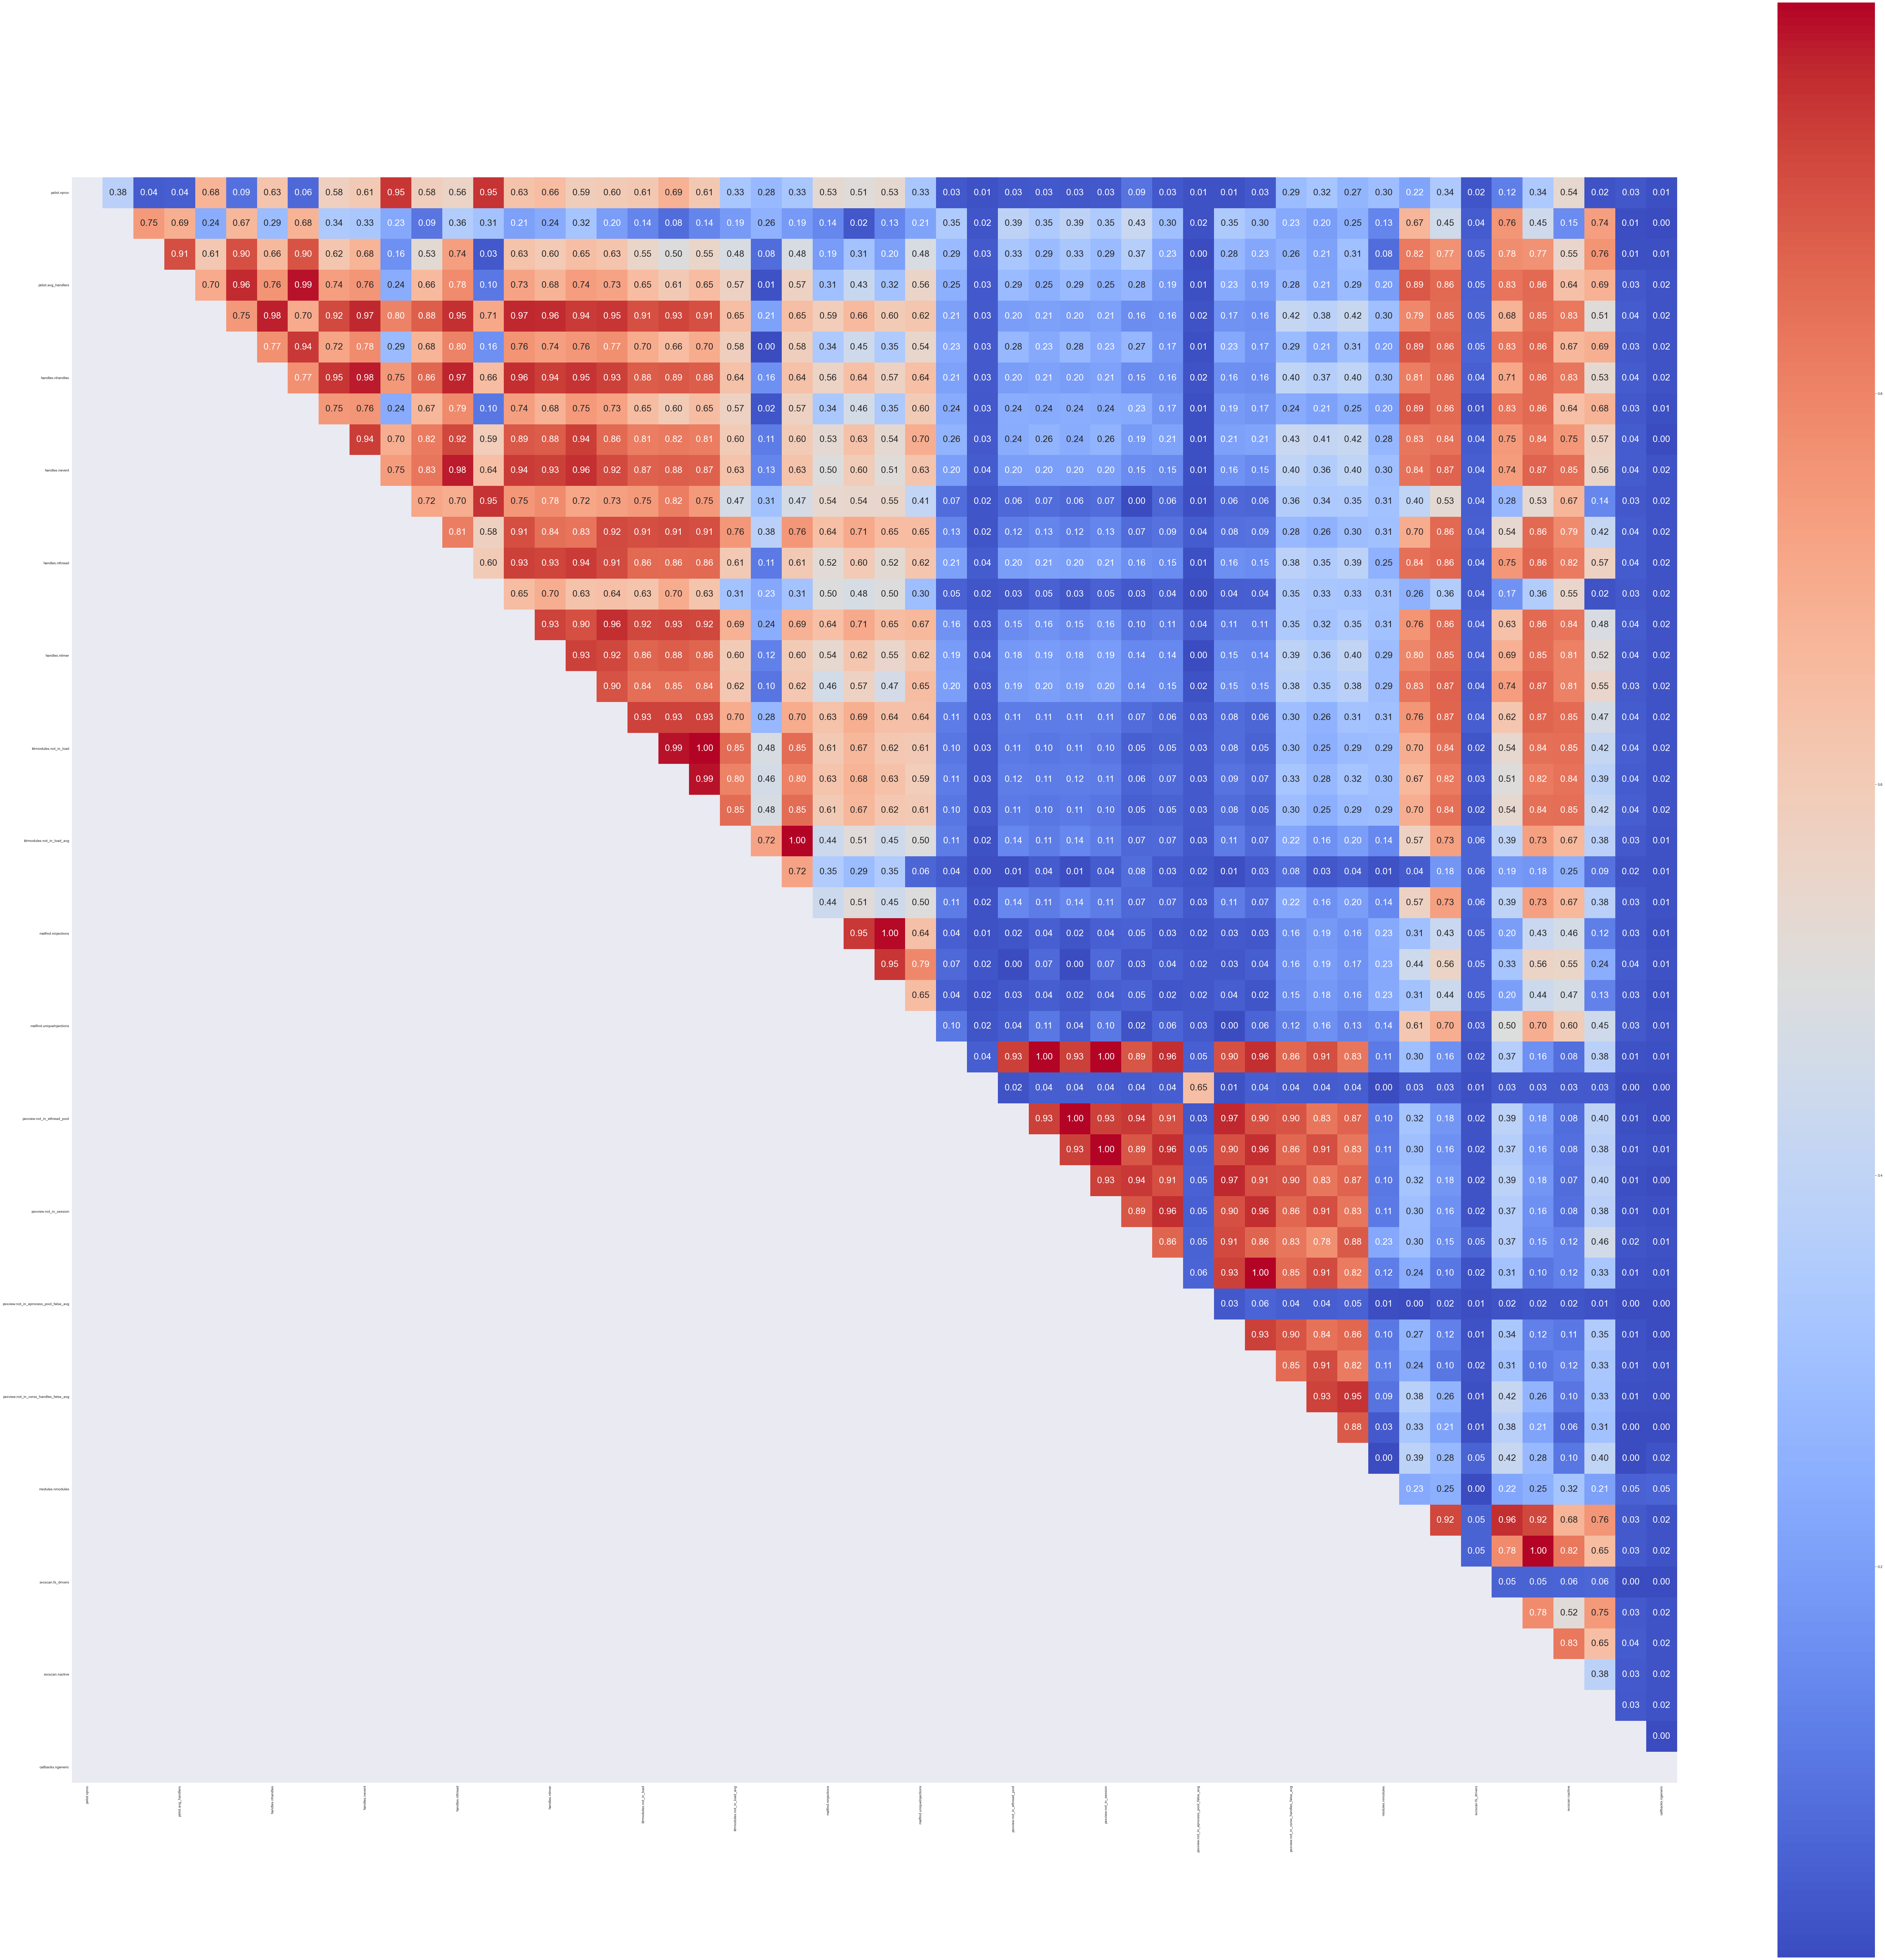

In [24]:
# heatmap
sns.heatmap(upper_tri, annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 25})
his = plt.gcf()
his.set_size_inches(100, 100)
plt.show()

In [25]:
#threshold
threshold = 0.8

#drop columns with correlation above threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

to_keep = [column for column in upper_tri.columns if any(upper_tri[column] <= threshold)]


In [27]:
len(to_drop)

37

In [28]:
X.columns.size

52

In [29]:
columns = X.columns.where(X.columns.isin(to_drop))

In [30]:
len(columns)

52

In [31]:
X.drop(to_drop, axis=1, inplace=True)

In [32]:
X.shape

(58596, 15)

In [ ]:
X.describe()

In [ ]:
# heatmap
sns.heatmap(X.corr().abs(), annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 25})
his = plt.gcf()
his.set_size_inches(100, 100)
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold = VarianceThreshold(threshold=0.0001)
VarianceThreshold.fit(X)

In [ ]:

VarianceThreshold.get_support()

In [ ]:
X.describe()

In [ ]:
X.columns


In [ ]:
to_drop = [column for column in X.columns if column not in X.columns[VarianceThreshold.get_support()]]

In [ ]:
len(to_drop)

In [ ]:
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
# heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 25})
his = plt.gcf()
his.set_size_inches(100, 100)
plt.show()

In [ ]:
dt = pd.concat([X, y], axis=1)
dt.columns = X.columns.tolist() + ['Class']

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
dt['Class'] = label_encoder.fit_transform(df['Class'])

dt['Class'].unique()


In [ ]:
dt.to_csv('Data/Obfuscated-MalMem2022-reprocessed.csv', index=False)